# Imports & Helpers
This section contains the imports for libraries and data as well as helper methods used to create the visualizations below.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import altair as alt
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns

In [2]:
def plot_active_users(courses, names, colors=["lightcoral", "firebrick", "lightsalmon", "coral", 'tan', 'peru', 'cornflowerblue', 'royalblue', "slateblue", 'darkslateblue', "orchid", 'darkmagenta', "pink", "palevioletred"]):    
    plt.figure(figsize=(20,5))
    plt.title("Active Users", fontsize=18, pad=20)
    plt.xlabel('Date')
    plt.ylabel('# of Active Users', fontsize=14)

    for i in range(len(courses)):
        plt.plot(courses[i]['Time'], courses[i]['Active Users'], color=colors[i], label=str(names[i]))

    plt.legend()
    plt.show()

In [3]:
def plot_active_users_annotations(course, name, annotations, color="dimgray"):    
    plt.figure(figsize=(20,5))
    plt.title("Active Users", fontsize=18, pad=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('# of Active Users', fontsize=14)
    plt.plot(course['Time'], course['Active Users'], color=color, label=str(name))
    plt.plot(annotations['x'], annotations['y'], 'o', color="black")
        
    for i in range(len(annotations['y'])):
        plt.text(annotations['x'][i], annotations['y'][i] + annotations['offset'][i], annotations['label'][i], color ="black", fontsize=14)
        plt.text(annotations['x'][i], annotations['y'][i] + 2 * annotations['offset'][i], annotations['x'][i], color ="black", fontsize=12)

    plt.legend()
    plt.show()

In [4]:
def plot_active_users_single(course, name, color="cornflowerblue"):    
    plt.figure(figsize=(20,5))
    plt.title("Active Users for " + str(name), fontsize=18, pad=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('# of Active Users', fontsize=14)
    plt.plot(course['Time'], course['Active Users'], color=color, label=str(name))

    plt.legend()
    plt.show()

In [5]:
def plot_usage(courses, names, colors=["lightcoral", "firebrick", "lightsalmon", "coral", 'tan', 'peru', 'cornflowerblue', 'royalblue', "slateblue", 'darkslateblue', "orchid", 'darkmagenta', "pink", "palevioletred"]):        
    plt.figure(figsize=(20,5))
    plt.title("Usage", fontsize=18, pad=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel("Usage", fontsize=14)

    for i in range(len(courses)):
        plt.plot(courses[i]['Time'], courses[i]['Value'] * 1.0 / (2 ** 30), color=colors[i], label=str(names[i]))

    plt.legend()
    plt.show()

In [6]:
def plot_usage_single(course, name, color="dimgray"):
    plt.figure(figsize=(20,5))
    plt.title("Usage for " + str(name), fontsize=18, pad=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel("Usage (GiB)", fontsize=14)
    plt.plot(course['Time'], course['Value'] * 1.0 / (2 ** 30), color=color, label=str(name))

    plt.legend()
    plt.show()

In [7]:
def plot_usage_annotations(course, name, annotations, color="dimgray"):      
    plt.figure(figsize=(20,5))
    plt.title("Usage for " + str(name), fontsize=18, pad=20)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel("Usage (GiB)", fontsize=14)
    plt.plot(course['Time'], course['Value'] * 1.0 / (2 ** 30), color=color, label=str(name))
    plt.plot(annotations['x'], annotations['y'], 'o', color="black")
    
    for i in range(len(annotations['y'])):
        plt.text(annotations['x'][i], annotations['y'][i] + annotations['offset'][i], annotations['label'][i], color ="black", fontsize=14)
        plt.text(annotations['x'][i], annotations['y'][i] + 2 * annotations['offset'][i], annotations['x'][i], color ="black", fontsize=12)

    plt.legend()
    plt.show()

In [8]:
def split_fasp(dataset):
    dataset['Time'] = pd.to_datetime(dataset['Time'])
    return [dataset[dataset['Time'] <= datetime(2020, 12, 18)], dataset[dataset['Time'] > datetime(2021, 1, 18)][dataset['Time'] <= datetime(2021, 5, 14)]]

In [9]:
def return_active_users(dataset, date):
    return dataset[dataset['Time'] == date]['Active Users']

In [10]:
def return_value(dataset, date):
    return dataset[dataset['Time'] == date]['Value']

In [11]:
def return_usage_value(dataset, date):
    return dataset[dataset['Time'] == date]['Value'] * 1.0 / (2 ** 30)

# Users
This section visualizes the number of unique users at each timestamp given in the Grafana data for each of the hubs. It separates the data between fall and spring semesters.

/Users/shashank/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/shashank/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


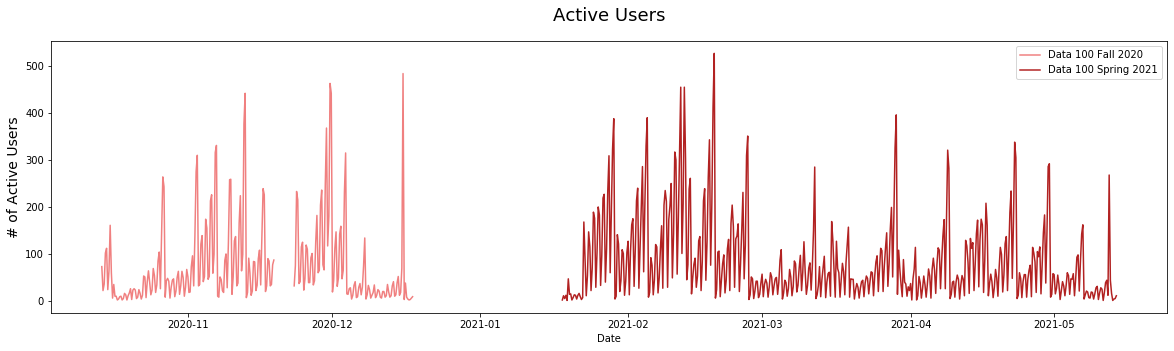

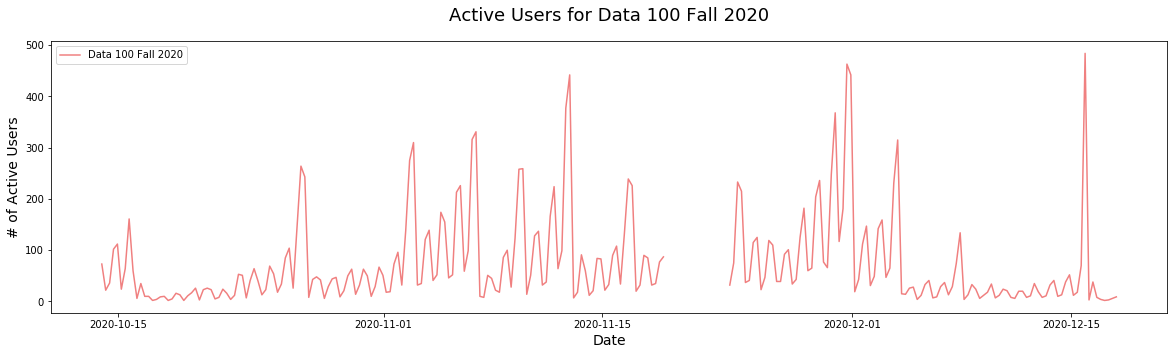

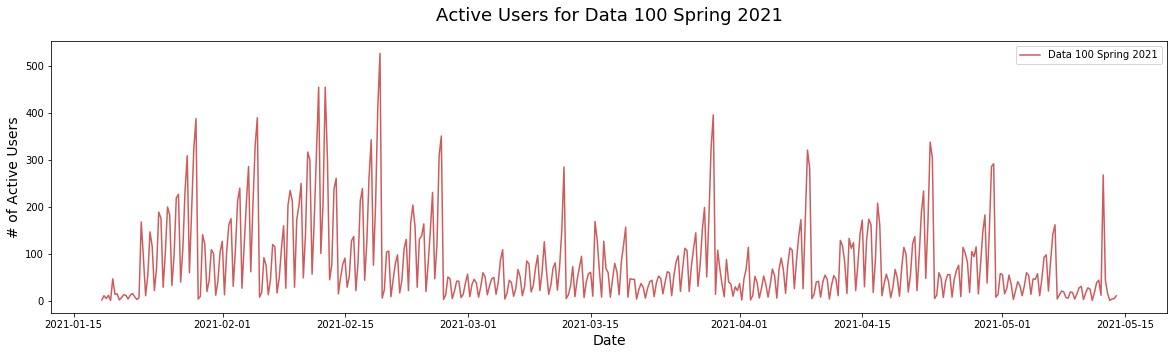

In [15]:
data100_path = '../data/grafana-full/data100hub/'
data100_users = pd.read_csv(data100_path + "data100_users.csv")

data100_old_path = '../data/grafana_old/data100hub/'
data100_old_users = pd.read_csv(data100_old_path + "data100_users.csv")

data100_fall_users = split_fasp(data100_old_users)[0]
data100_spring_users = split_fasp(data100_users)[1]

plot_active_users([data100_fall_users, data100_spring_users], ["Data 100 Fall 2020", "Data 100 Spring 2021"])
plot_active_users_single(data100_fall_users, "Data 100 Fall 2020", "lightcoral")
plot_active_users_single(data100_spring_users, "Data 100 Spring 2021", "indianred")

/Users/shashank/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


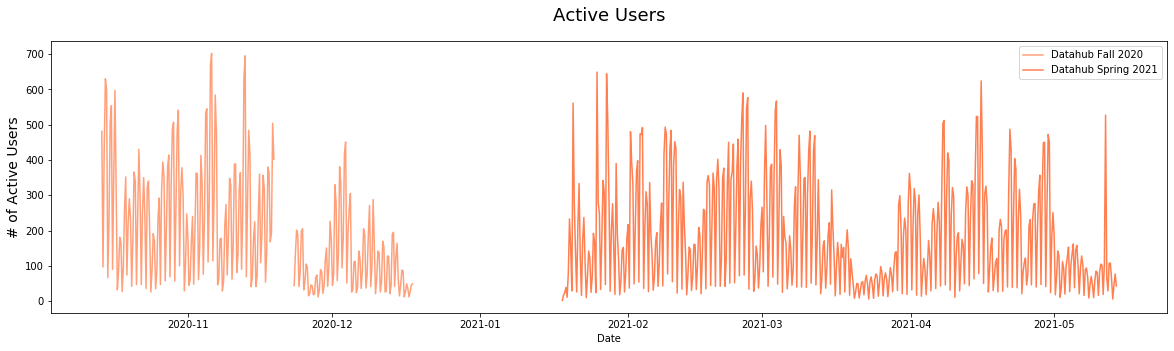

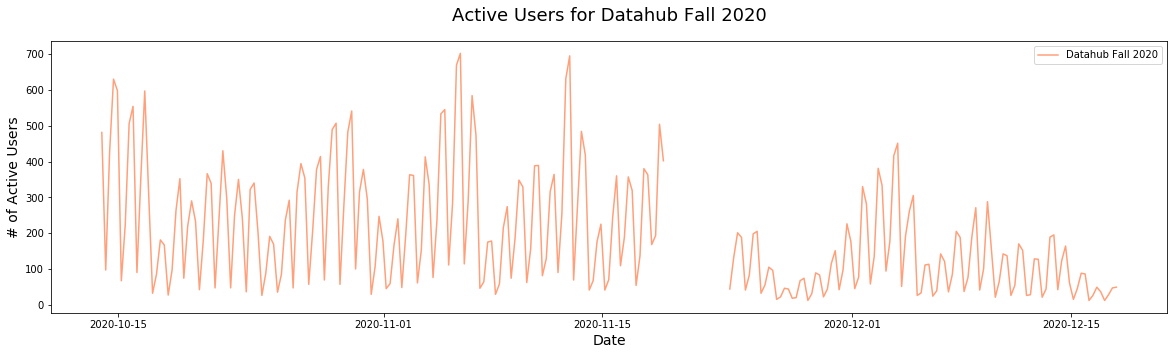

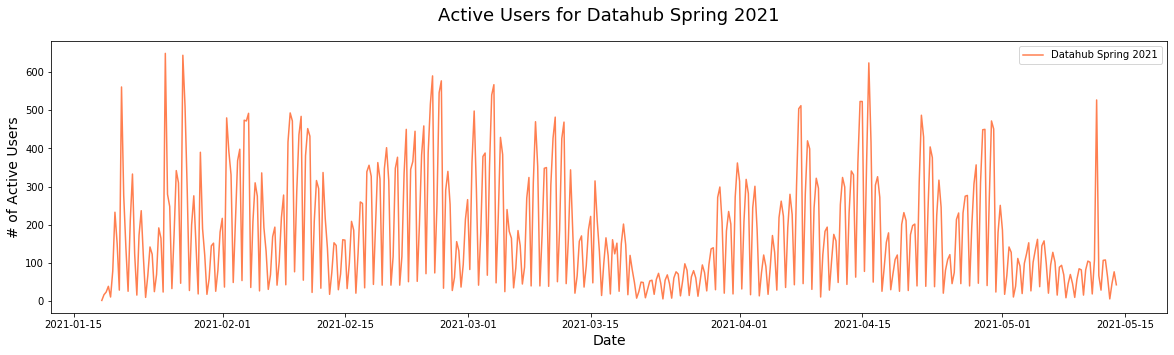

In [16]:
datahub_path = '../data/grafana-full/datahub/'
datahub_users = pd.read_csv(datahub_path + "datahub_users.csv")

datahub_old_path = '../data/grafana_old/datahub/'
datahub_old_users = pd.read_csv(datahub_old_path + "datahub_users.csv")

datahub_fall_users = split_fasp(datahub_old_users)[0]
datahub_spring_users = split_fasp(datahub_users)[1]

plot_active_users([datahub_fall_users, datahub_spring_users], ["Datahub Fall 2020", "Datahub Spring 2021"], ["lightsalmon", "coral"])
plot_active_users_single(datahub_fall_users, "Datahub Fall 2020", "lightsalmon")
plot_active_users_single(datahub_spring_users, "Datahub Spring 2021", "coral")

/Users/shashank/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


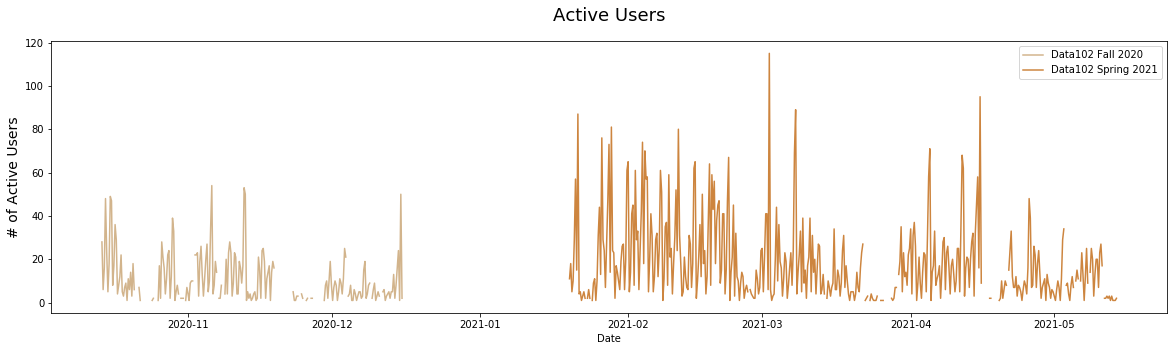

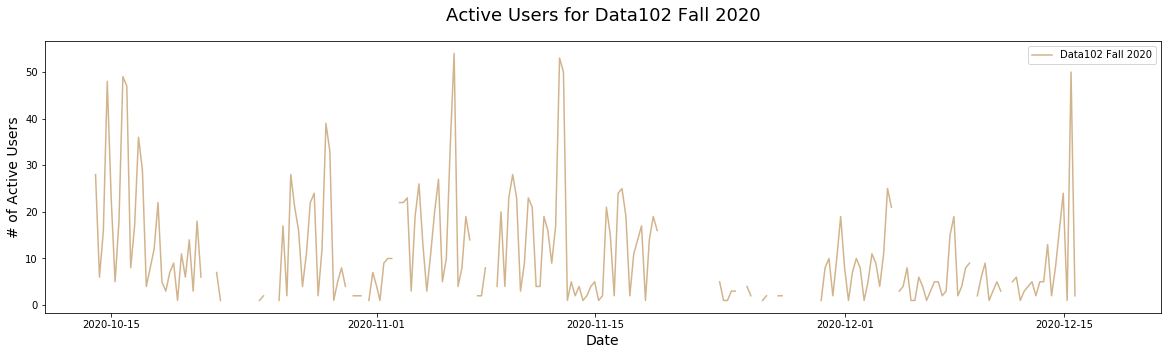

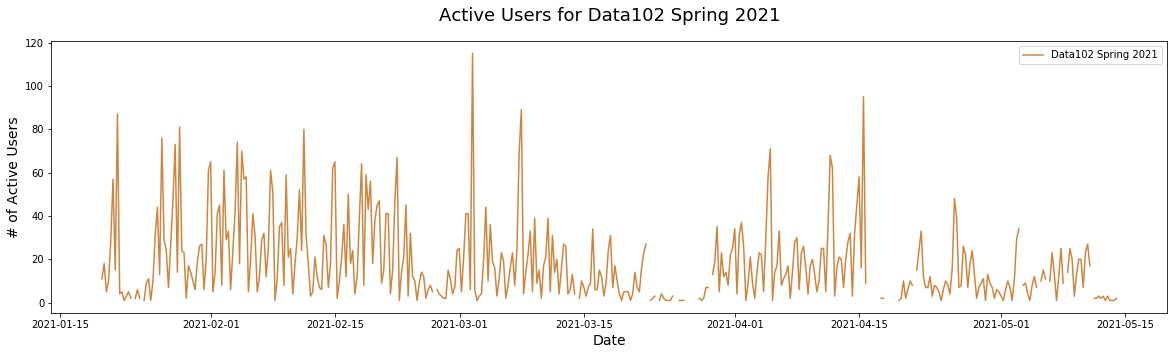

In [17]:
data102_path = '../data/grafana-full/data102hub/'
data102_users = pd.read_csv(data102_path + "data102_users.csv")

data102_old_path = '../data/grafana_old/data102hub/'
data102_old_users = pd.read_csv(data102_old_path + "data102_users.csv")

data102_fall_users = split_fasp(data102_old_users)[0]
data102_spring_users = split_fasp(data102_users)[1]

plot_active_users([data102_fall_users, data102_spring_users], ["Data102 Fall 2020", "Data102 Spring 2021"], ['tan', 'peru'])
plot_active_users_single(data102_fall_users, "Data102 Fall 2020", 'tan')
plot_active_users_single(data102_spring_users, "Data102 Spring 2021", 'peru')

/Users/shashank/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


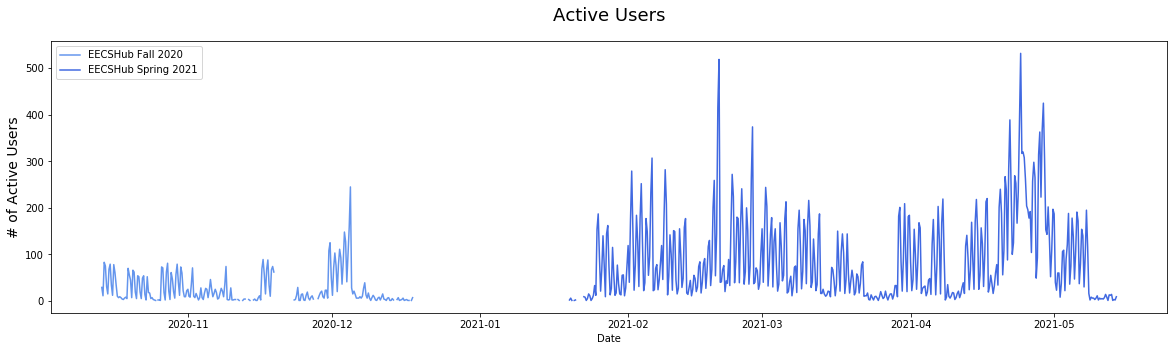

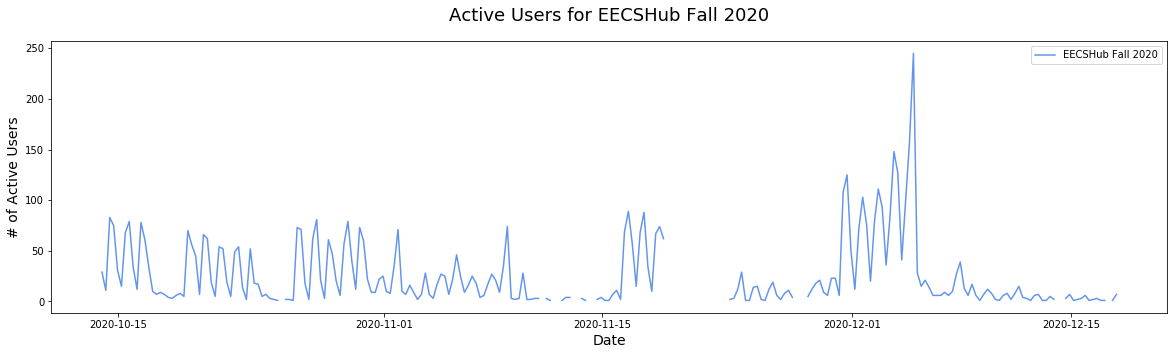

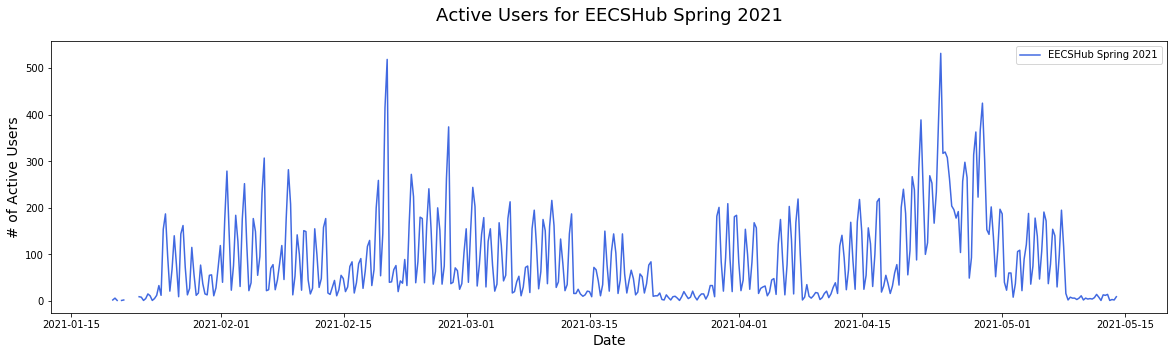

In [18]:
eecs_path = '../data/grafana-full/eecshub/'
eecs_users = pd.read_csv(eecs_path + "eecs_users.csv")

eecs_old_path = '../data/grafana_old/eecshub/'
eecs_old_users = pd.read_csv(eecs_old_path + "eecs_users.csv")

eecs_fall_users = split_fasp(eecs_old_users)[0]
eecs_spring_users = split_fasp(eecs_users)[1]

plot_active_users([eecs_fall_users, eecs_spring_users], ["EECSHub Fall 2020", "EECSHub Spring 2021"], ['cornflowerblue', 'royalblue'])
plot_active_users_single(eecs_fall_users, "EECSHub Fall 2020", 'cornflowerblue')
plot_active_users_single(eecs_spring_users, "EECSHub Spring 2021", 'royalblue')

/Users/shashank/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


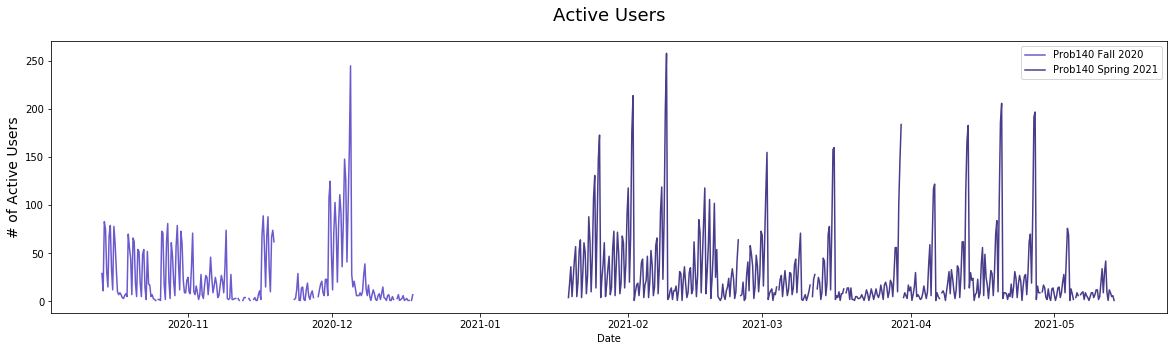

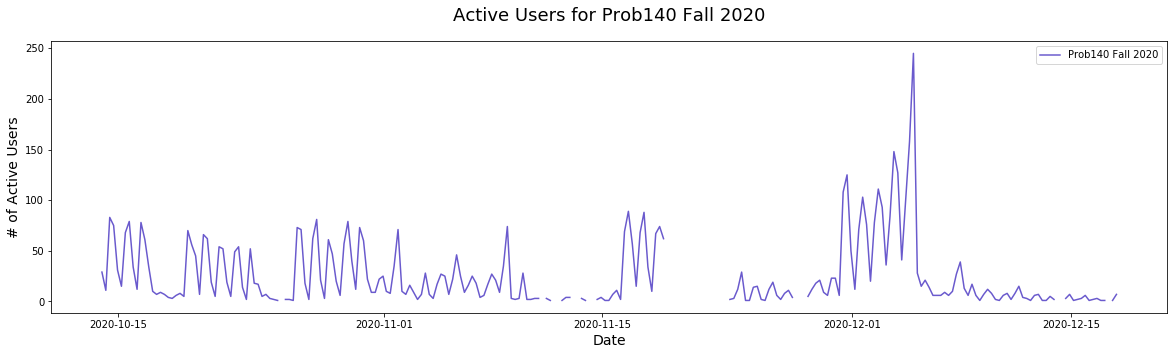

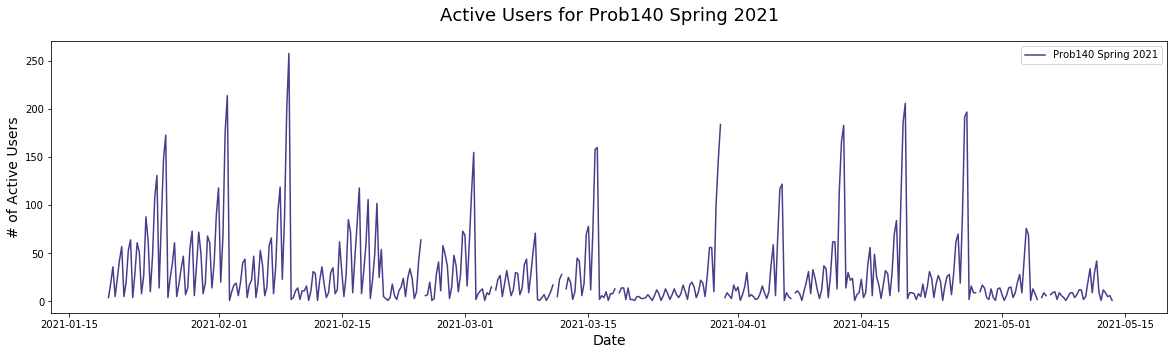

In [19]:
prob140_path = '../data/grafana-full/prob140hub/'
prob140_users = pd.read_csv(prob140_path + "prob140_users.csv")

prob140_old_path = '../data/grafana_old/eecshub/'
prob140_old_users = pd.read_csv(prob140_old_path + "eecs_users.csv")

prob140_fall_users = split_fasp(prob140_old_users)[0]
prob140_spring_users = split_fasp(prob140_users)[1]

plot_active_users([prob140_fall_users, prob140_spring_users], ["Prob140 Fall 2020", "Prob140 Spring 2021"], ["slateblue", 'darkslateblue'])
plot_active_users_single(prob140_fall_users, "Prob140 Fall 2020", "slateblue")
plot_active_users_single(prob140_spring_users, "Prob140 Spring 2021", "darkslateblue")

/Users/shashank/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


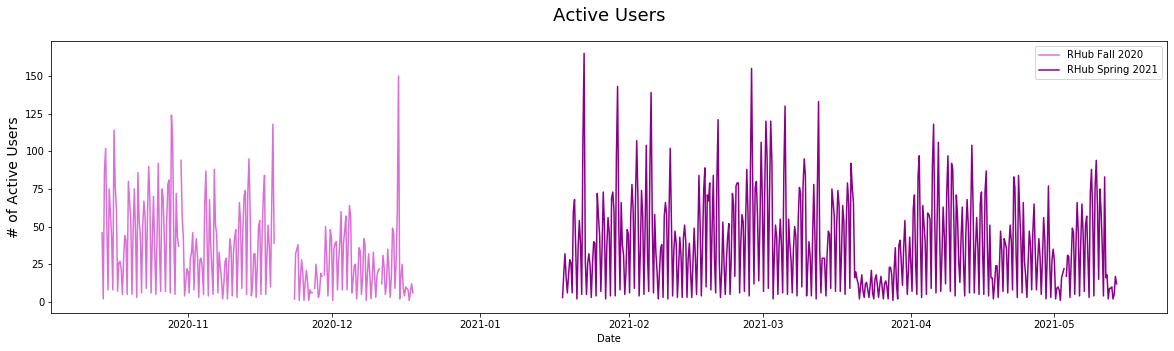

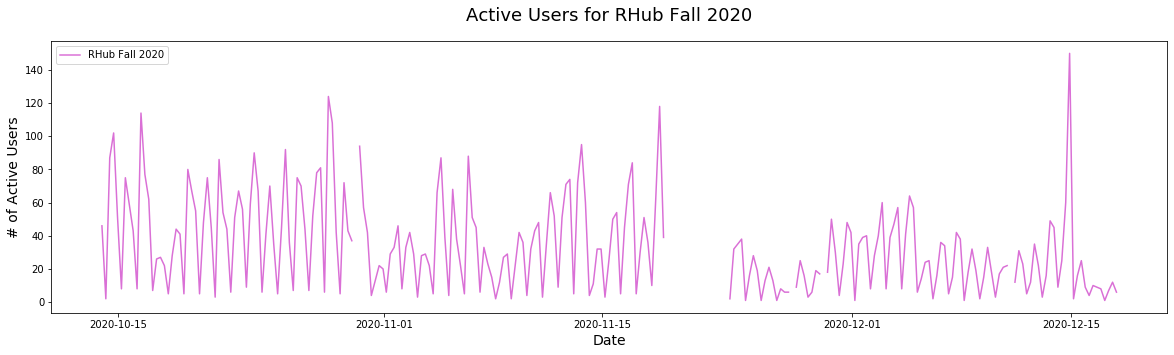

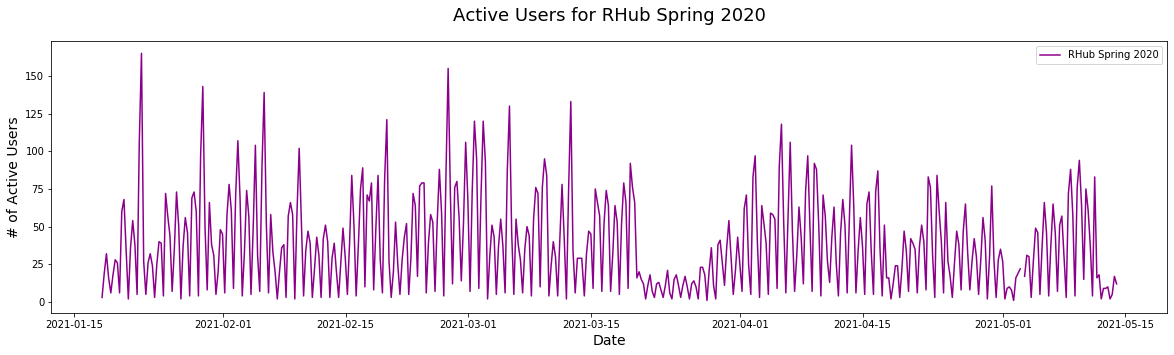

In [20]:
rhub_path = '../data/grafana-full/rhub/'
rhub_users = pd.read_csv(rhub_path + "rhub_users.csv")

rhub_path_old = '../data/grafana_old/rhub/'
rhub_users_old = pd.read_csv(rhub_path_old + "rhub_users.csv")

rhub_fall_users = split_fasp(rhub_users_old)[0]
rhub_spring_users = split_fasp(rhub_users)[1]

plot_active_users([rhub_fall_users, rhub_spring_users], ["RHub Fall 2020", "RHub Spring 2021"], ["orchid", 'darkmagenta'])
plot_active_users_single(rhub_fall_users, "RHub Fall 2020", "orchid")
plot_active_users_single(rhub_spring_users, "RHub Spring 2020", "darkmagenta")

/Users/shashank/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


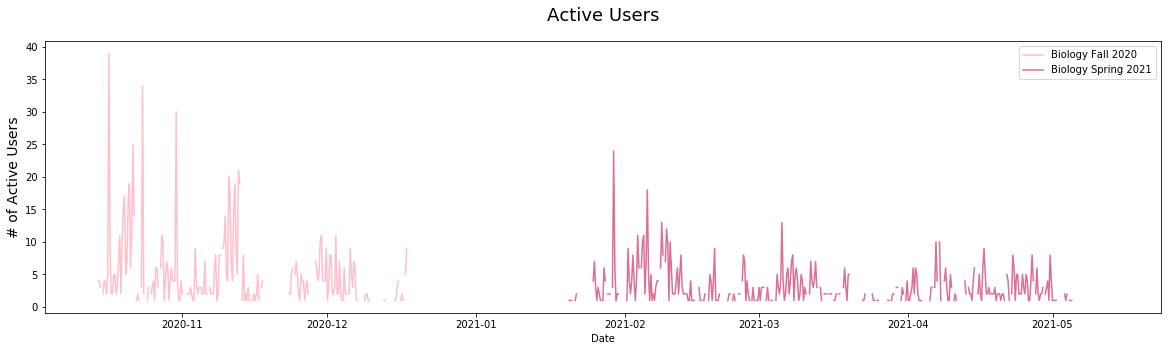

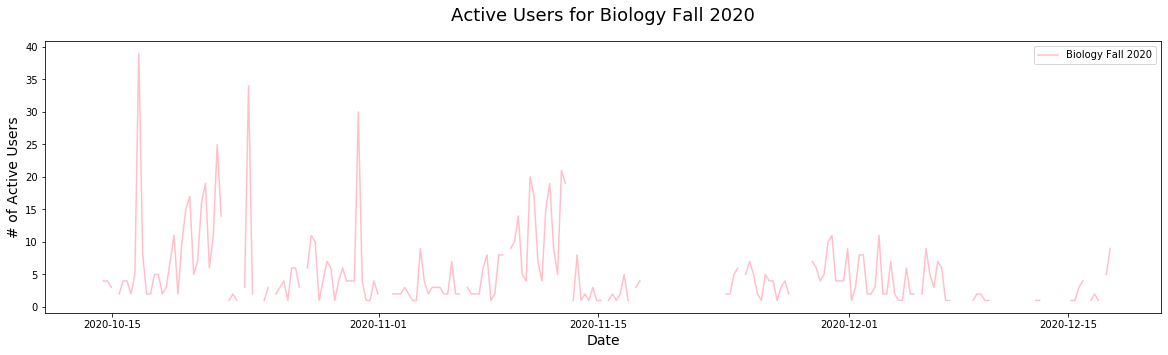

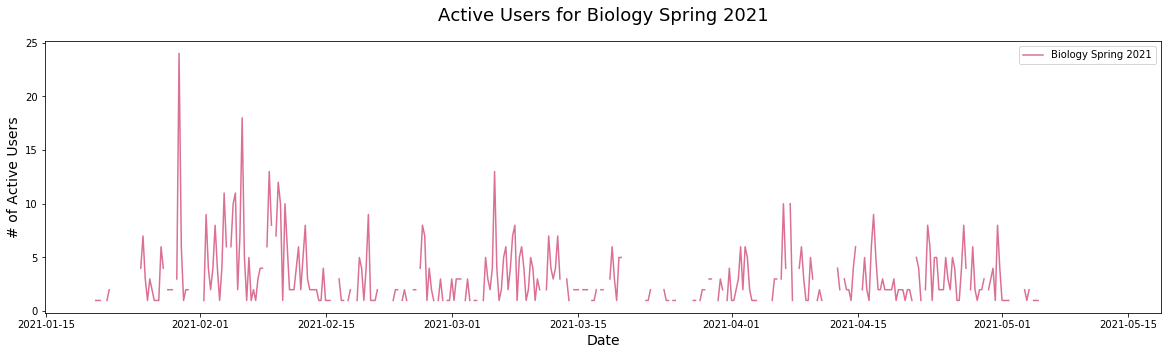

In [21]:
biology_path = '../data/grafana-full/biology/'
biology_users = pd.read_csv(biology_path + "biology_users.csv")

biology_path_old = '../data/grafana_old/biology/'
biology_users_old = pd.read_csv(biology_path_old + "biology_users.csv")

biology_fall_users = split_fasp(biology_users_old)[0]
biology_spring_users = split_fasp(biology_users)[1]

plot_active_users([biology_fall_users, biology_spring_users], ["Biology Fall 2020", "Biology Spring 2021"], ["pink", "palevioletred"])
plot_active_users_single(biology_fall_users, "Biology Fall 2020", "pink")
plot_active_users_single(biology_spring_users, "Biology Spring 2021", "palevioletred")

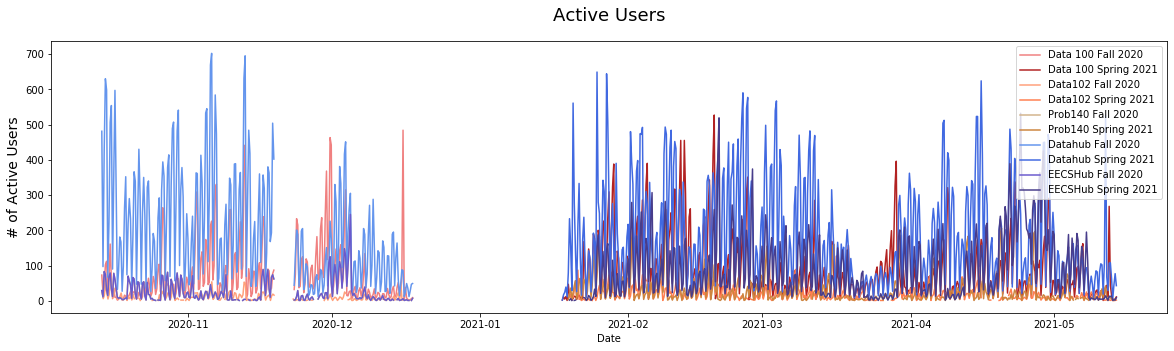

In [22]:
# Please note that we're not plotting RHub or Biology Hub on this graph since their values are so small that they don't show up
courses = data100_fall_users, data100_spring_users, data102_fall_users, data102_spring_users, prob140_fall_users, prob140_spring_users, datahub_fall_users, datahub_spring_users, eecs_fall_users, eecs_spring_users # split_fasp(rhub_cpu), split_fasp(biology_cpu)
names = ["Data 100 Fall 2020", "Data 100 Spring 2021", "Data102 Fall 2020", "Data102 Spring 2021", "Prob140 Fall 2020", "Prob140 Spring 2021", "Datahub Fall 2020", "Datahub Spring 2021", "EECSHub Fall 2020", "EECSHub Spring 2021", "RHub Fall 2020", "RHub Spring 2021", "Biology Fall 2020", "Biology Spring 2021"]

plot_active_users(courses, names)

In [23]:
colors=["lightcoral", "firebrick", "lightsalmon", "coral", 'tan', 'peru', 'cornflowerblue', 'royalblue', "slateblue", 'darkslateblue', "orchid", 'darkmagenta', "pink", "palevioletred"]

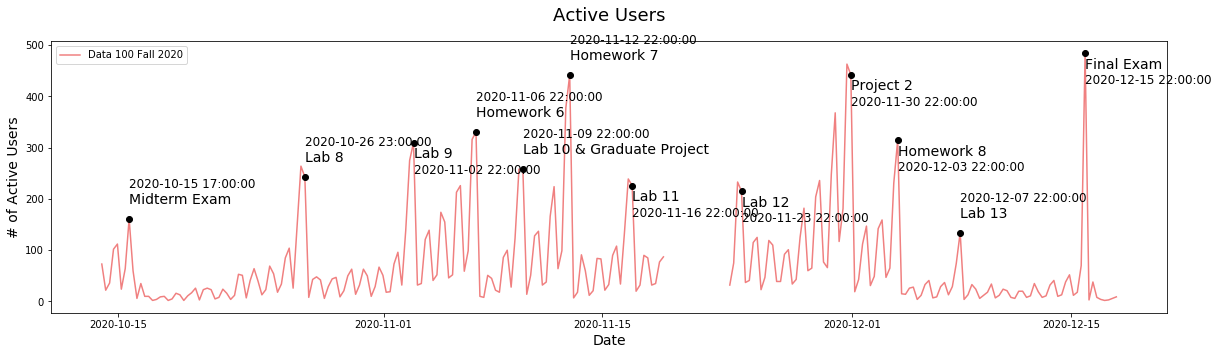

In [24]:
data100_dates = [ 
    datetime(2020, 10, 15, 17, 0, 0), datetime(2020, 10, 26, 23, 0, 0), datetime(2020, 11, 2, 22, 0, 0), 
    datetime(2020, 11, 6, 22, 0, 0), datetime(2020, 11, 9, 22, 0, 0), datetime(2020, 11, 12, 22, 0, 0), 
    datetime(2020, 11, 16, 22, 0, 0), datetime(2020, 11, 23, 22, 0, 0), datetime(2020, 11, 30, 22, 0, 0), 
    datetime(2020, 12, 3, 22, 0, 0), datetime(2020, 12, 7, 22, 0, 0), datetime(2020, 12, 15, 22, 0, 0)
]

data100_fall_labels = ['Midterm Exam', 'Lab 8', 'Lab 9', 'Homework 6', 'Lab 10 & Graduate Project', 'Homework 7', 
              'Lab 11', 'Lab 12', 'Project 2', 'Homework 8', 'Lab 13', 'Final Exam']

data100_annotations = pd.DataFrame({
    'x': data100_dates,
    'y': [return_active_users(data100_old_users, date) for date in data100_dates],
    'label': data100_fall_labels,
    'offset': [30, 30, -30, 30, 30, 30, -30, -30, -30, -30, 30, -30]
})

plot_active_users_annotations(data100_fall_users, "Data 100 Fall 2020", data100_annotations, colors[0])

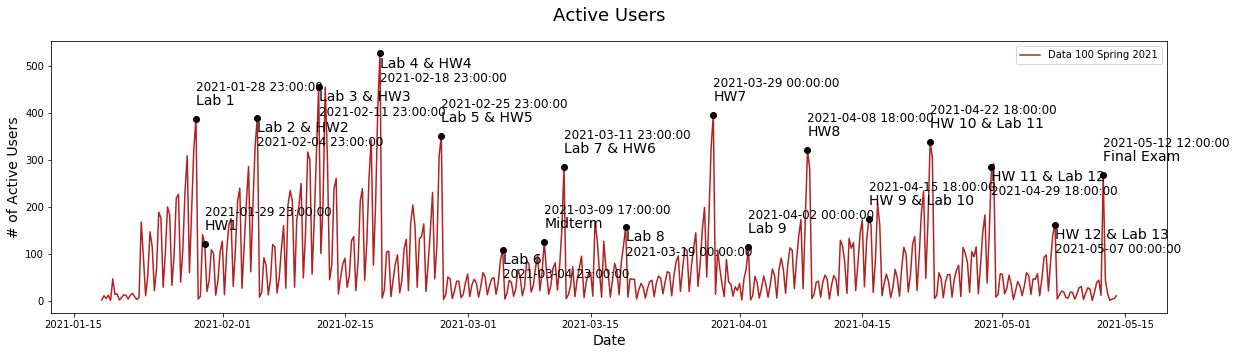

In [25]:
data100_spring_dates = [ 
    datetime(2021, 1, 28, 23, 0, 0), datetime(2021, 1, 29, 23, 0, 0), datetime(2021, 2, 4, 23, 0, 0),
    datetime(2021, 2, 11, 23, 0, 0), datetime(2021, 2, 18, 23, 0, 0), datetime(2021, 2, 25, 23, 0, 0),
    datetime(2021, 3, 4, 23, 0, 0), datetime(2021, 3, 9, 17, 0, 0), datetime(2021, 3, 11, 23, 0, 0), 
    datetime(2021, 3, 19, 0, 0, 0), datetime(2021, 3, 29, 0, 0, 0), datetime(2021, 4, 2, 0, 0, 0), 
    datetime(2021, 4, 8, 18, 0, 0), datetime(2021, 4, 15, 18, 0, 0), datetime(2021, 4, 22, 18, 0, 0),
    datetime(2021, 4, 29, 18, 0, 0), datetime(2021, 5, 7, 0, 0, 0), datetime(2021, 5, 12, 12, 0, 0),
]

data100_spring_labels = ['Lab 1', 'HW1', 'Lab 2 & HW2', 'Lab 3 & HW3', 
                         'Lab 4 & HW4', 'Lab 5 & HW5', 'Lab 6', 'Midterm', 
                         'Lab 7 & HW6', 'Lab 8', 'HW7', 'Lab 9', 'HW8',
                         'HW 9 & Lab 10', 'HW 10 & Lab 11', 'HW 11 & Lab 12',
                         'HW 12 & Lab 13', 'Final Exam'
                        ]
data100_spring_offsets = [30, 30, -30, -30, -30, 30, -30, 30, 30, -30, 30, 30, 30, 30, 30, -30, -30, 30]

data100_spring_annotations = pd.DataFrame({
    'x': data100_spring_dates,
    'y': [return_active_users(data100_users, date) for date in data100_spring_dates],
    'label': data100_spring_labels,
    'offset': data100_spring_offsets,
})

plot_active_users_annotations(data100_spring_users, "Data 100 Spring 2021", data100_spring_annotations, colors[1])

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


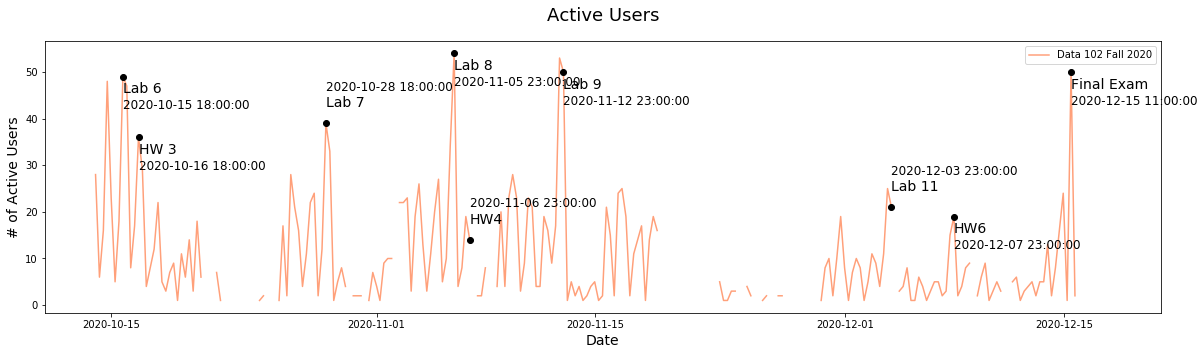

In [26]:
offset = 3.5
data102_fall = [ 
    datetime(2020, 10, 15, 18, 0, 0), datetime(2020, 10, 16, 18, 0, 0), datetime(2020, 10, 28, 18, 0, 0), 
    datetime(2020, 11, 5, 23, 0, 0), datetime(2020, 11, 6, 23, 0, 0),
    datetime(2020, 11, 12, 23, 0, 0), datetime(2020, 11, 19, 23, 0, 0), datetime(2020, 11, 20, 23, 0, 0),
    datetime(2020, 12, 3, 23, 0, 0), datetime(2020, 12, 7, 23, 0, 0), datetime(2020, 12, 15, 11, 0, 0)
]

data102_fall_labels = ['Lab 6', 'HW 3', 'Lab 7', 'Lab 8', 'HW4', 'Lab 9', 'Lab 10', 'HW5', 'Lab 11', 
                       'HW6', 'Final Exam']
data102_fall_offsets = [-offset, -offset, offset, -offset, offset, -offset, -offset, offset, offset, 
                        -offset, -offset]

data102_fall_annotations = pd.DataFrame({
    'x': data102_fall,
    'y': [return_active_users(data102_old_users, date) for date in data102_fall],
    'label': data102_fall_labels,
    'offset': data102_fall_offsets
})

plot_active_users_annotations(data102_fall_users, "Data 102 Fall 2020", data102_fall_annotations, colors[2])

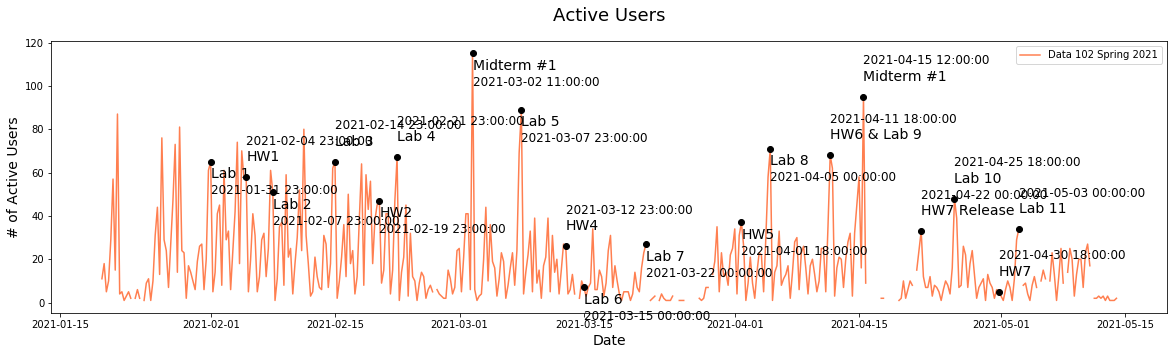

In [27]:
offset = 7.5
data102_spring = [ 
    datetime(2021, 1, 31, 23, 0, 0), datetime(2021, 2, 4, 23, 0, 0), datetime(2021, 2, 7, 23, 0, 0), 
    datetime(2021, 2, 14, 23, 0, 0), datetime(2021, 2, 19, 23, 0, 0), 
    datetime(2021, 2, 21, 23, 0, 0), datetime(2021, 3, 2, 11, 0, 0), datetime(2021, 3, 7, 23, 0, 0),
    datetime(2021, 3, 12, 23, 0, 0), datetime(2021, 3, 15, 0, 0, 0), datetime(2021, 3, 22, 0, 0, 0), 
    datetime(2021, 4, 5, 0, 0, 0), datetime(2021, 4, 1, 18, 0, 0), datetime(2021, 4, 11, 18, 0, 0),
    datetime(2021, 4, 15, 12, 0, 0), datetime(2021, 4, 22, 0, 0, 0), datetime(2021, 4, 25, 18, 0, 0), 
    datetime(2021, 4, 30, 18, 0, 0),  datetime(2021, 5, 3, 0, 0, 0),
]

data102_spring_labels = ['Lab 1', 'HW1', 'Lab 2', 'Lab 3', 'HW2', 'Lab 4', 'Midterm #1', 'Lab 5', 
                         'HW4', 'Lab 6', 'Lab 7', 'Lab 8', 'HW5', 'HW6 & Lab 9', 'Midterm #1', 'HW7 Release',
                         'Lab 10', 'HW7', 'Lab 11'
                        ]

data102_spring_offsets = [-offset, offset, -offset, offset, -offset, offset, -offset, -offset, 
                          offset, -offset, -offset, -offset, -offset, offset, offset, offset, offset, offset, offset]

data102_spring_annotations = pd.DataFrame({
    'x': data102_spring,
    'y': [return_active_users(data102_users, date) for date in data102_spring],
    'label': data102_spring_labels,
    'offset': data102_spring_offsets
})

plot_active_users_annotations(data102_spring_users, "Data 102 Spring 2021", data102_spring_annotations, colors[3])

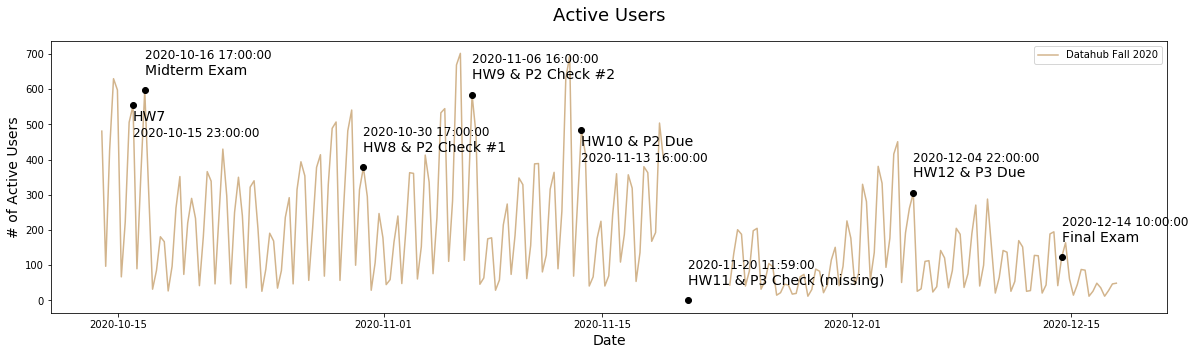

In [28]:
offset = 45
datahub_fall = [ 
    datetime(2020, 10, 15, 23, 0, 0), datetime(2020, 10, 16, 17, 0, 0), datetime(2020, 10, 30, 17, 0, 0),
    datetime(2020, 11, 6, 16, 0, 0), datetime(2020, 11, 13, 16, 0, 0), datetime(2020, 11, 20, 11, 59, 0),
    datetime(2020, 12, 4, 22, 0, 0), datetime(2020, 12, 14, 10, 0, 0)
]

datahub_fall_labels = [
    'HW7', 'Midterm Exam', 'HW8 & P2 Check #1', 
    'HW9 & P2 Check #2', 'HW10 & P2 Due', 
    'HW11 & P3 Check (missing)', 'HW12 & P3 Due', 'Final Exam'
]
datahub_fall_offsets = [-offset, offset, offset, offset, -offset, offset, offset, offset]

datahub_fall_annotations = pd.DataFrame({
    'x': datahub_fall,
    'y': [0 if date == datetime(2020, 11, 20, 11, 59, 0) else return_active_users(datahub_old_users, date) for date in datahub_fall],
    'label': datahub_fall_labels,
    'offset': datahub_fall_offsets
})

plot_active_users_annotations(datahub_fall_users, "Datahub Fall 2020", datahub_fall_annotations, colors[4])

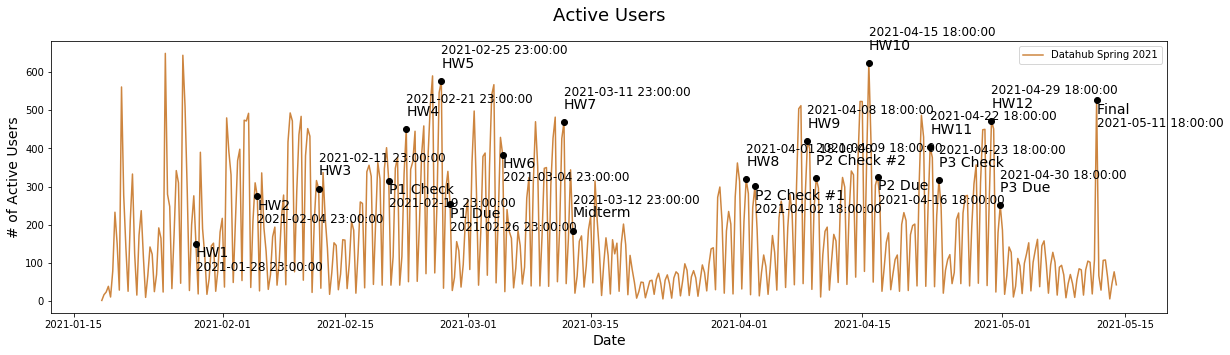

In [29]:
offset = 35
datahub_spring = [ 
    datetime(2021, 1, 28, 23, 0, 0), datetime(2021, 2, 4, 23, 0, 0), datetime(2021, 2, 11, 23, 0, 0),
    datetime(2021, 2, 19, 23, 0, 0), datetime(2021, 2, 21, 23, 0, 0), datetime(2021, 2, 25, 23, 0, 0),
    datetime(2021, 2, 26, 23, 0, 0), datetime(2021, 3, 4, 23, 0, 0), datetime(2021, 3, 11, 23, 0, 0),
    datetime(2021, 3, 12, 23, 0, 0), datetime(2021, 4, 1, 18, 0, 0), datetime(2021, 4, 2, 18, 0, 0),
    datetime(2021, 4, 8, 18, 0, 0), datetime(2021, 4, 9, 18, 0, 0),
    datetime(2021, 4, 15, 18, 0, 0), datetime(2021, 4, 16, 18, 0, 0), datetime(2021, 4, 22, 18, 0, 0), 
    datetime(2021, 4, 23, 18, 0, 0), datetime(2021, 4, 29, 18, 0, 0), datetime(2021, 4, 30, 18, 0, 0),
    datetime(2021, 5, 11, 18, 0, 0),
]

datahub_spring_labels = ['HW1', 'HW2', 'HW3', 'P1 Check', 'HW4', 'HW5', 'P1 Due', 'HW6',  'HW7', 
                         'Midterm', 'HW8', 'P2 Check #1', 'HW9', 'P2 Check #2',
                         'HW10', 'P2 Due', 'HW11', 'P3 Check', 'HW12', 'P3 Due', 'Final'
                        ]
datahub_spring_offsets = [-offset, -offset, offset, -offset, offset, offset, -offset, -offset, offset, 
                          offset, offset, -offset, offset, offset, 
                          offset, -offset, offset, offset, offset, offset, -offset
                         ]

datahub_spring_annotations = pd.DataFrame({
    'x': datahub_spring,
    'y': [return_active_users(datahub_users, date) for date in datahub_spring],
    'label': datahub_spring_labels,
    'offset': datahub_spring_offsets
})

plot_active_users_annotations(datahub_spring_users, "Datahub Spring 2021", datahub_spring_annotations, colors[5])

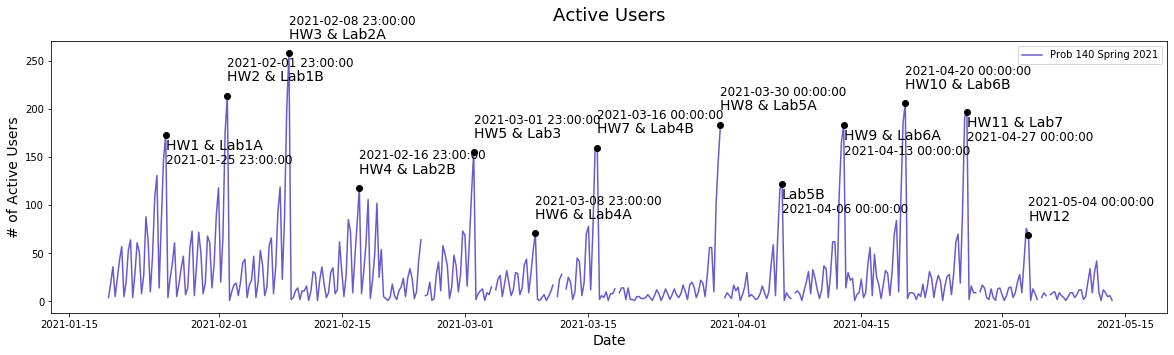

In [30]:
offset = 15
prob140_spring = [ 
    datetime(2021, 1, 25, 23, 0, 0), datetime(2021, 2, 1, 23, 0, 0), datetime(2021, 2, 8, 23, 0, 0), 
    datetime(2021, 2, 16, 23, 0, 0), datetime(2021, 3, 1, 23, 0, 0), datetime(2021, 3, 8, 23, 0, 0), 
    datetime(2021, 3, 16, 0, 0, 0), datetime(2021, 3, 30, 0, 0, 0), datetime(2021, 4, 6, 0, 0, 0), 
    datetime(2021, 4, 13, 0, 0, 0), datetime(2021, 4, 20, 0, 0, 0), datetime(2021, 4, 27, 0, 0, 0),
    datetime(2021, 5, 4, 0, 0, 0)
]

prob140_spring_labels = [
    'HW1 & Lab1A', 'HW2 & Lab1B', 'HW3 & Lab2A', 
    'HW4 & Lab2B', 'HW5 & Lab3', 'HW6 & Lab4A', 
    'HW7 & Lab4B', 'HW8 & Lab5A', 'Lab5B', 
    'HW9 & Lab6A', 'HW10 & Lab6B', 'HW11 & Lab7',
    'HW12'
]

prob140_spring_offsets = [
    -offset, offset, offset, offset, offset, offset, offset, offset,
    -offset, -offset, offset, -offset, offset
]

prob140_fall_annotations = pd.DataFrame({
    'x': prob140_spring,
    'y': [return_active_users(prob140_users, date) for date in prob140_spring],
    'label': prob140_spring_labels,
    'offset': prob140_spring_offsets
})

plot_active_users_annotations(prob140_spring_users, "Prob 140 Spring 2021", prob140_fall_annotations, colors[8])

# Usage
This section visualizes the usage at each timestamp given in the Grafana data for each of the hubs. It separates the data between fall and spring semesters.

/Users/shashank/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


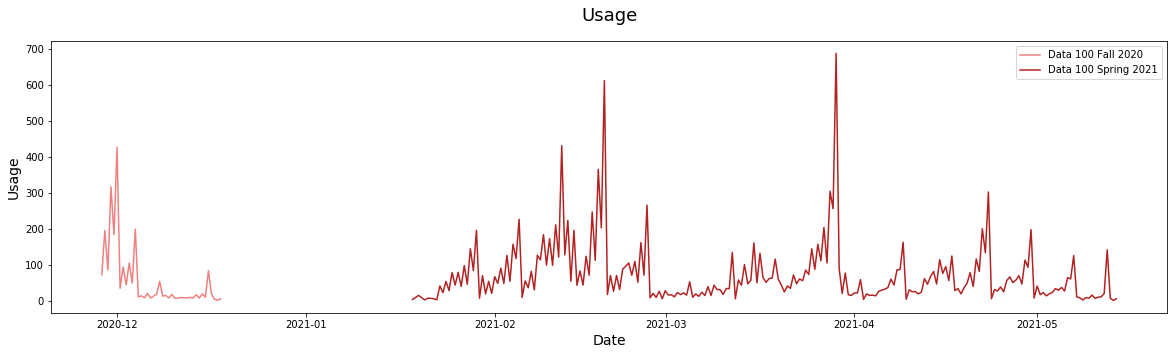

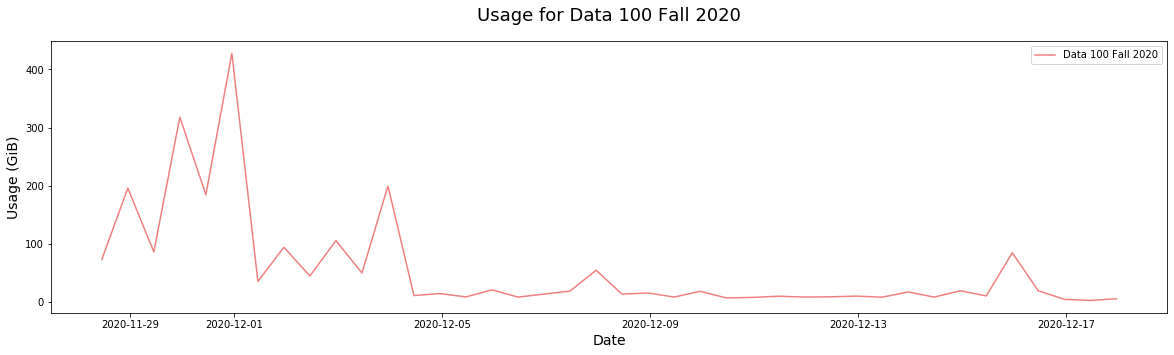

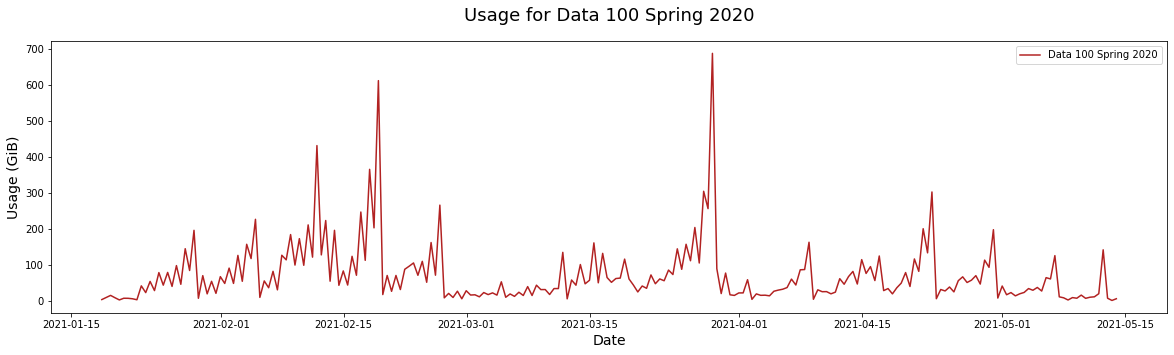

In [31]:
data100_path = '../data/grafana-full/data100hub/'
data100_use = pd.read_csv(data100_path + 'data100_usage.csv')

data100_fall_usage, data100_spring_usage = split_fasp(data100_use)
names = ["Data 100 Fall 2020", "Data 100 Spring 2021"]

plot_usage([data100_fall_usage, data100_spring_usage], ["Data 100 Fall 2020", "Data 100 Spring 2021"], [colors[0], colors[1]])
plot_usage_single(data100_fall_usage, "Data 100 Fall 2020", colors[0])
plot_usage_single(data100_spring_usage, "Data 100 Spring 2020", colors[1])

/Users/shashank/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


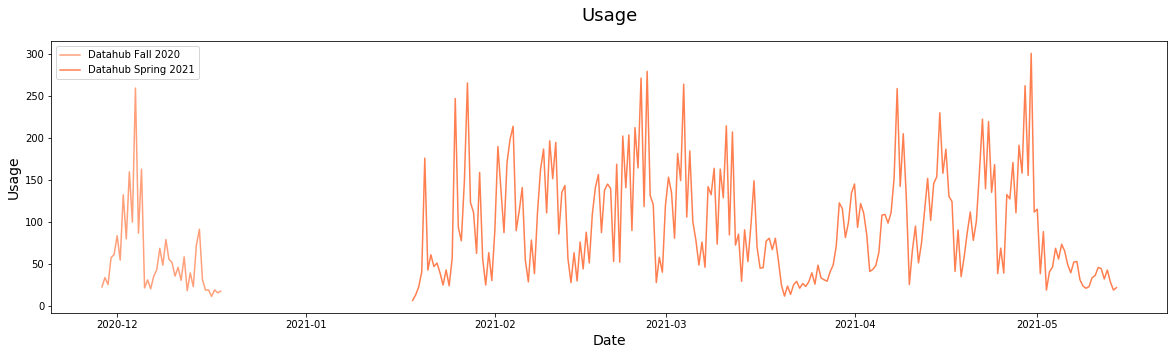

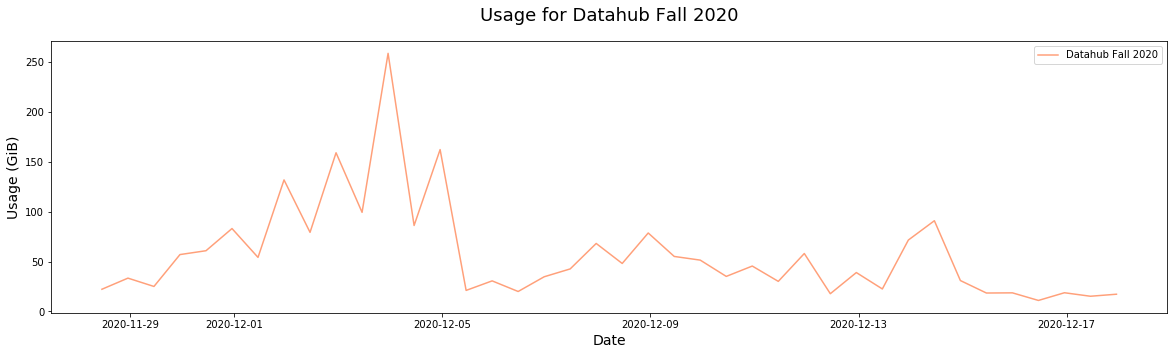

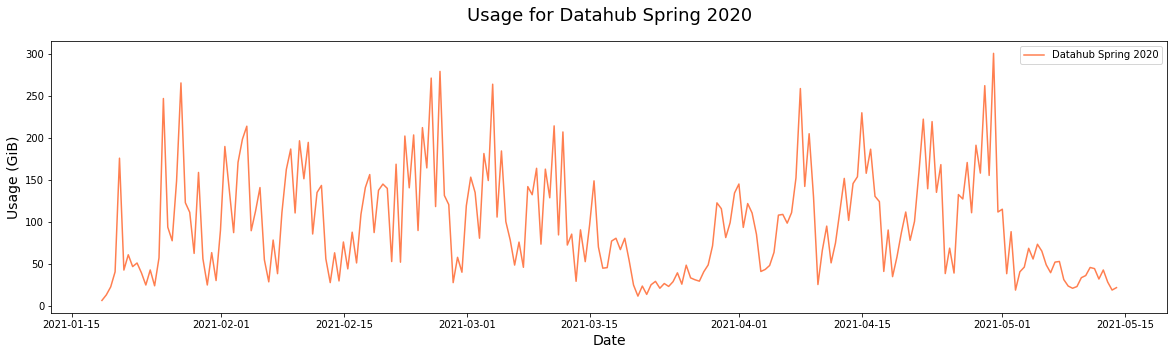

In [32]:
datahub_path = '../data/grafana-full/datahub/'
datahub_usage = pd.read_csv(datahub_path + 'datahub_usage.csv')

datahub_fall_usage, datahub_spring_usage = split_fasp(datahub_usage)

plot_usage([datahub_fall_usage, datahub_spring_usage], ["Datahub Fall 2020", "Datahub Spring 2021"], [colors[2], colors[3]])
plot_usage_single(datahub_fall_usage, "Datahub Fall 2020", colors[2])
plot_usage_single(datahub_spring_usage, "Datahub Spring 2020", colors[3])

/Users/shashank/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


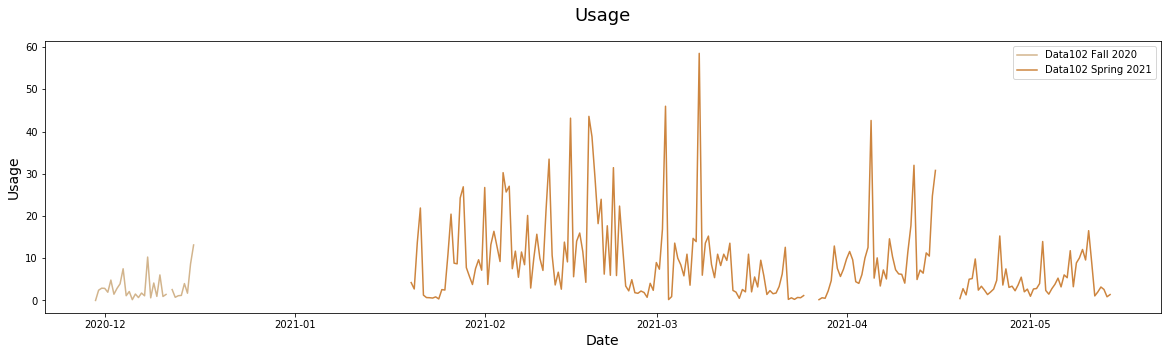

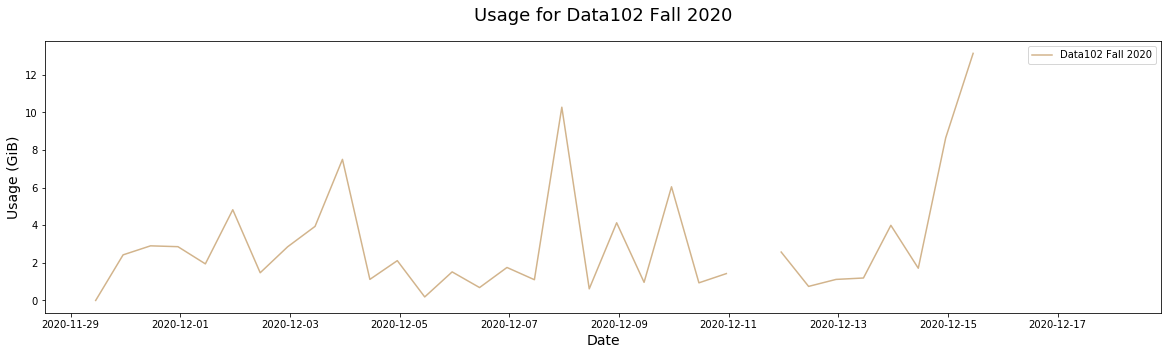

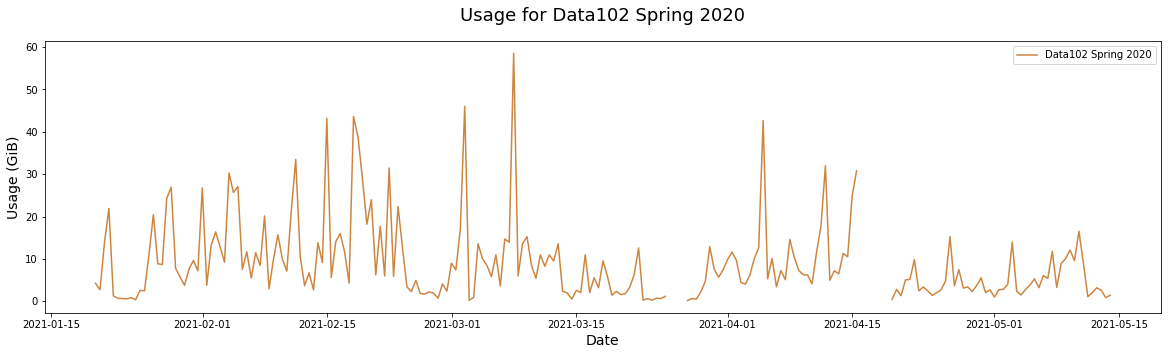

In [33]:
data102_path = '../data/grafana-full/data102hub/'
data102_usage = pd.read_csv(data102_path + "data102_usage.csv")

data102_fall_usage, data102_spring_usage = split_fasp(data102_usage)
names = ["Data102 Fall 2020", "Data102 Spring 2021"]

plot_usage([data102_fall_usage, data102_spring_usage], ["Data102 Fall 2020", "Data102 Spring 2021"], [colors[4], colors[5]])
plot_usage_single(data102_fall_usage, "Data102 Fall 2020", colors[4])
plot_usage_single(data102_spring_usage, "Data102 Spring 2020", colors[5])

/Users/shashank/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


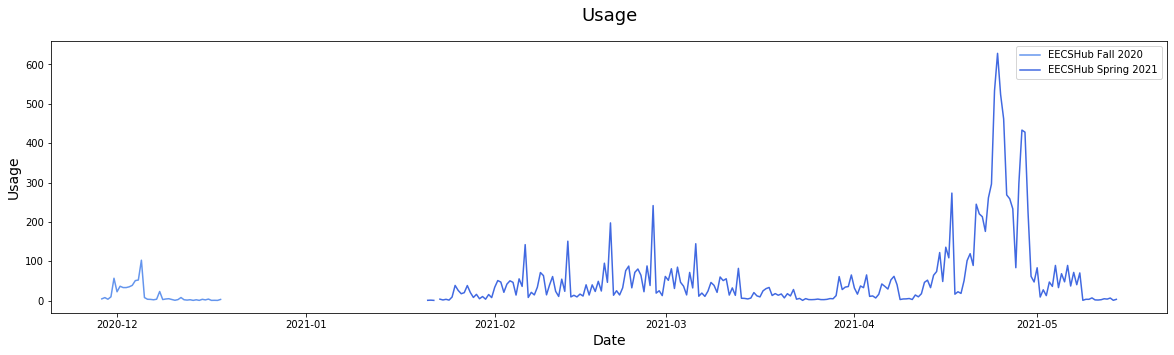

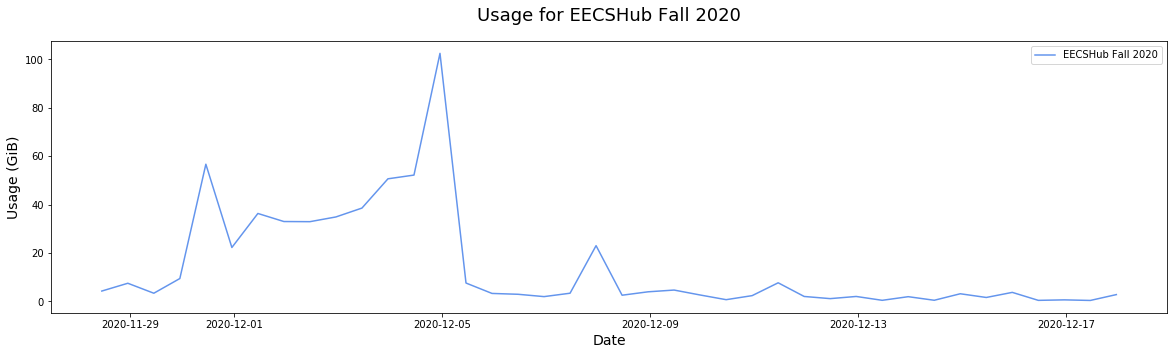

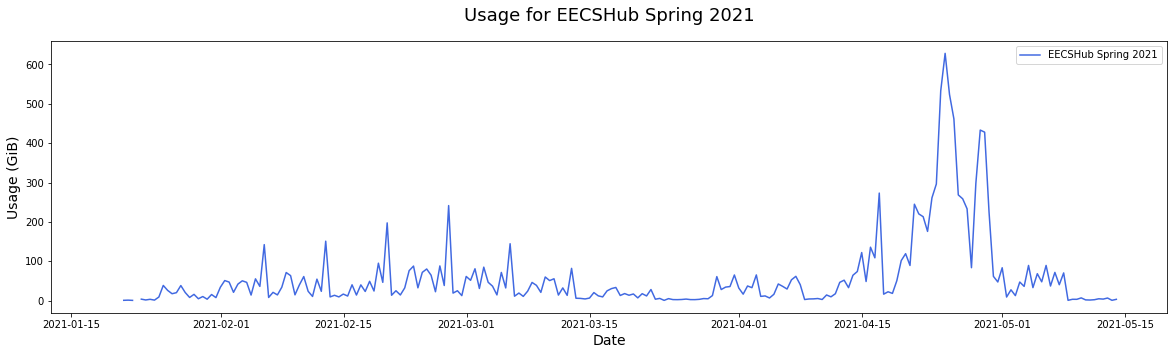

In [34]:
eecs_path = '../data/grafana-full/eecshub/'
eecs_usage = pd.read_csv(eecs_path + "eecs_usage.csv")

eecs_fall_usage, eecs_spring_usage = split_fasp(eecs_usage)

plot_usage([eecs_fall_usage, eecs_spring_usage], ["EECSHub Fall 2020", "EECSHub Spring 2021"], [colors[6], colors[7]])
plot_usage_single(eecs_fall_usage, "EECSHub Fall 2020", colors[6])
plot_usage_single(eecs_spring_usage, "EECSHub Spring 2021", colors[7])

/Users/shashank/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


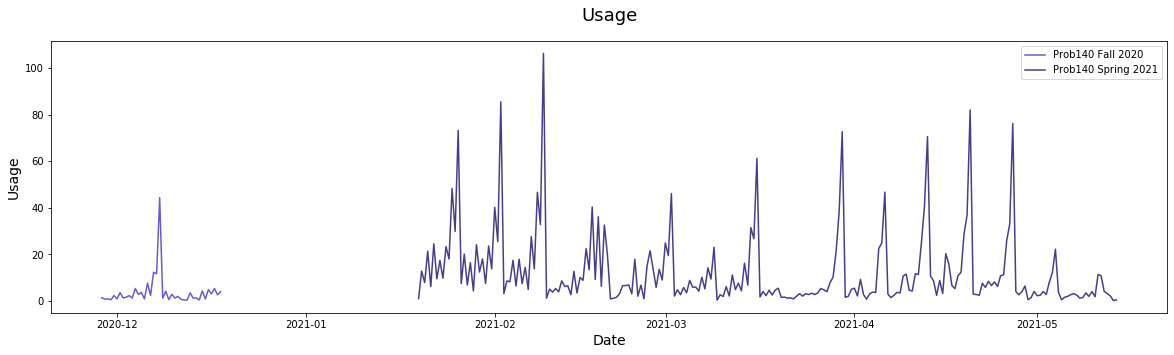

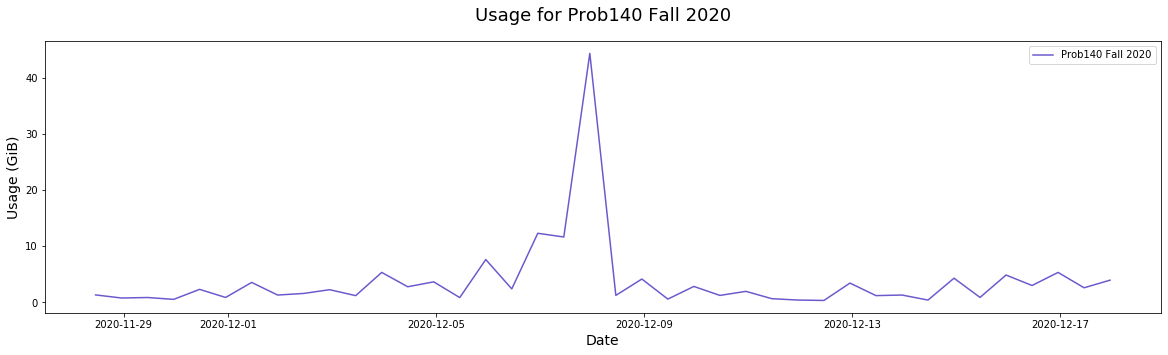

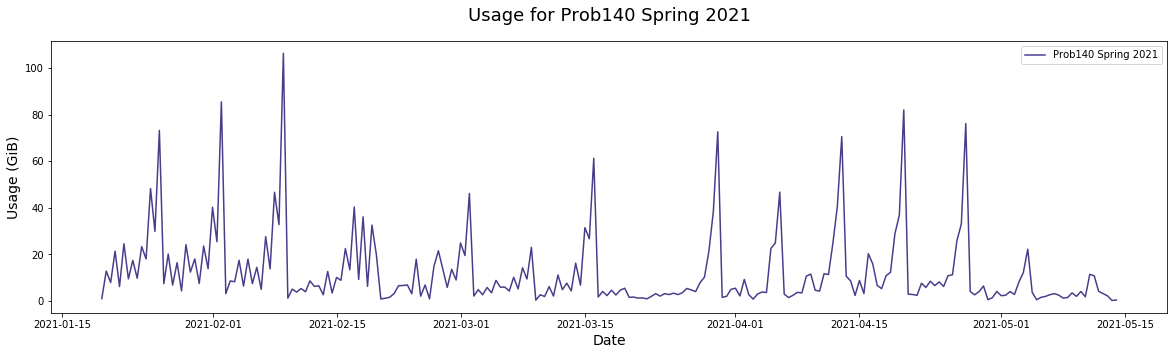

In [35]:
prob140_path = '../data/grafana-full/prob140hub/'
prob140_usage = pd.read_csv(prob140_path + "prob140_usage.csv")

prob140_fall_usage, prob140_spring_usage = split_fasp(prob140_usage)

plot_usage([prob140_fall_usage, prob140_spring_usage], ["Prob140 Fall 2020", "Prob140 Spring 2021"], [colors[8], colors[9]])
plot_usage_single(prob140_fall_usage, "Prob140 Fall 2020", colors[8])
plot_usage_single(prob140_spring_usage, "Prob140 Spring 2021", colors[9])

/Users/shashank/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


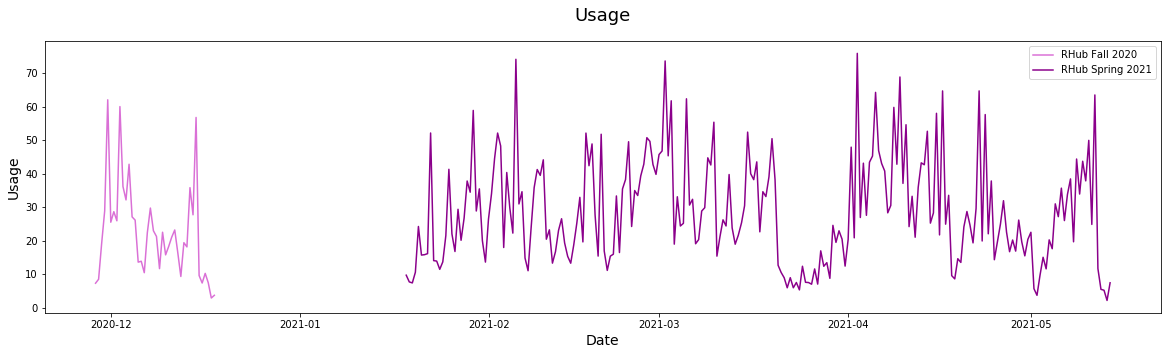

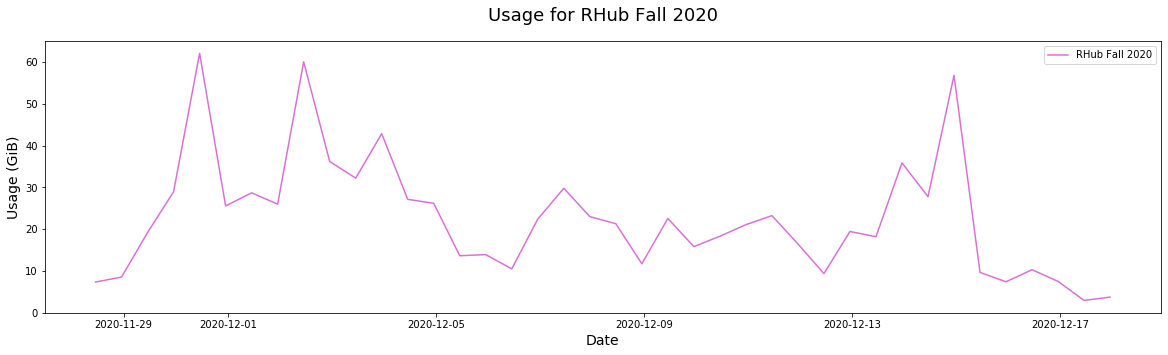

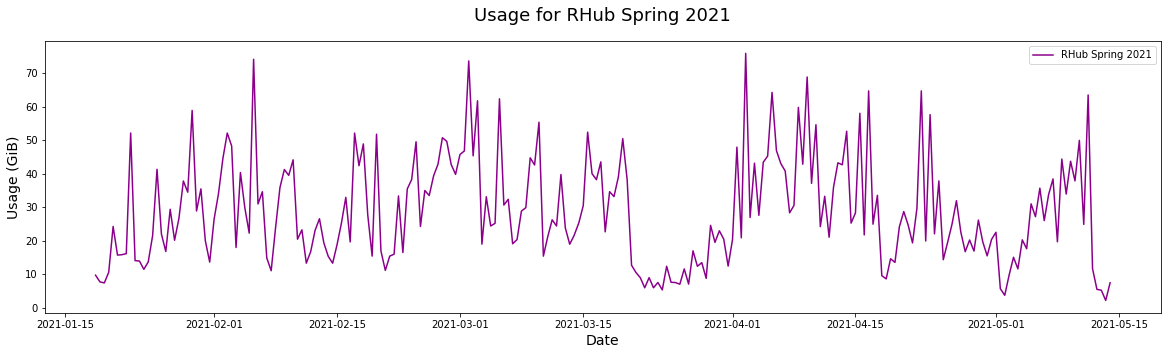

In [36]:
rhub_path = '../data/grafana-full/rhub/'
rhub_usage = pd.read_csv(rhub_path + "rhub_usage.csv")

rhub_fall_usage, rhub_spring_usage = split_fasp(rhub_usage)

plot_usage([rhub_fall_usage, rhub_spring_usage], ["RHub Fall 2020", "RHub Spring 2021"], [colors[10], colors[11]])
plot_usage_single(rhub_fall_usage, "RHub Fall 2020", colors[10])
plot_usage_single(rhub_spring_usage, "RHub Spring 2021", colors[11])

/Users/shashank/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


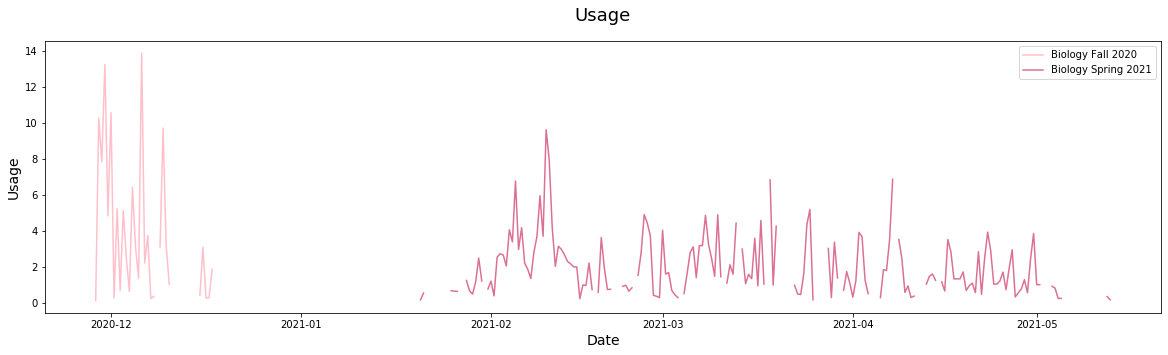

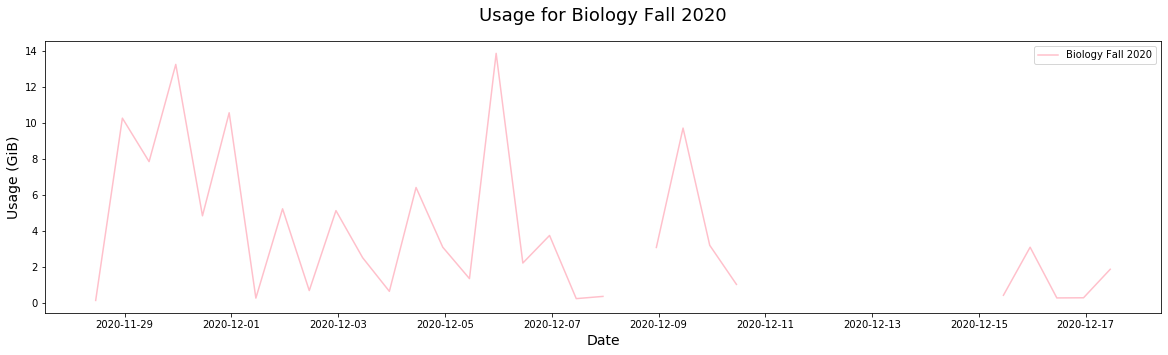

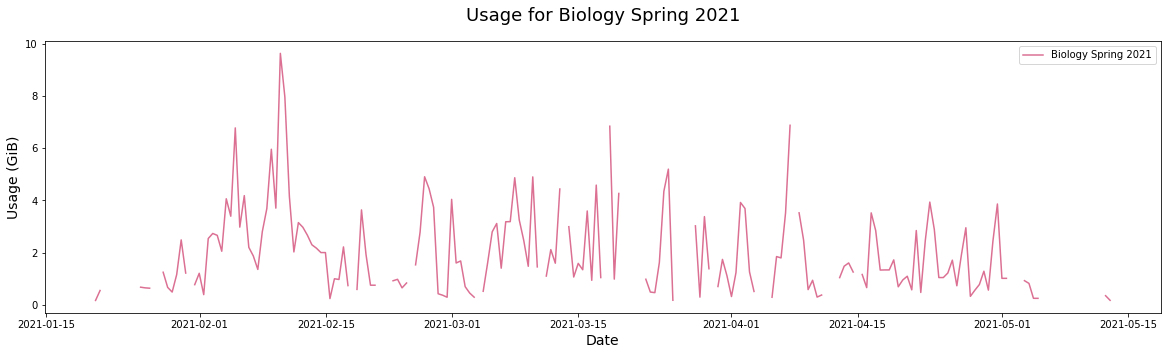

In [37]:
biology_path = '../data/grafana-full/biology/'
biology_usage = pd.read_csv(biology_path + "biology_usage.csv")

biology_fall_usage, biology_spring_usage = split_fasp(biology_usage)

plot_usage([biology_fall_usage, biology_spring_usage], ["Biology Fall 2020", "Biology Spring 2021"], [colors[12], colors[13]])
plot_usage_single(biology_fall_usage, "Biology Fall 2020", colors[12])
plot_usage_single(biology_spring_usage, "Biology Spring 2021", colors[13])

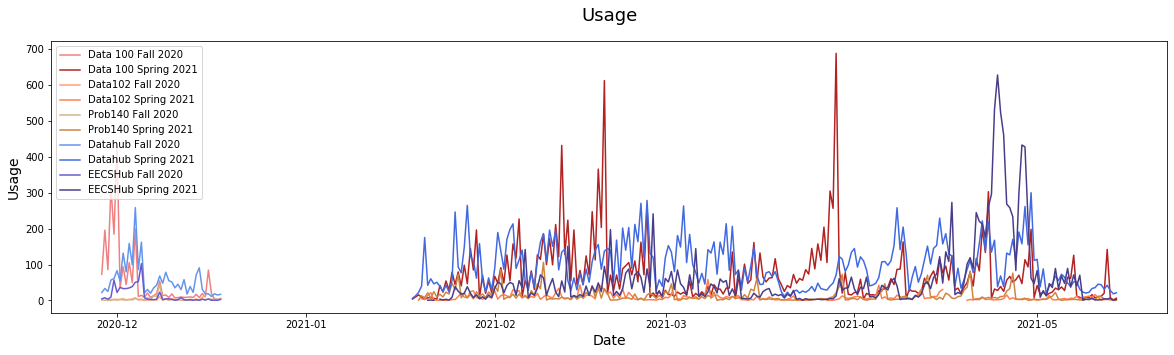

In [38]:
courses = data100_fall_usage, data100_spring_usage, data102_fall_usage, data102_spring_usage, prob140_fall_usage, prob140_spring_usage, datahub_fall_usage, datahub_spring_usage, eecs_fall_usage, eecs_spring_usage # split_fasp(rhub_cpu), split_fasp(biology_cpu)
names = ["Data 100 Fall 2020", "Data 100 Spring 2021", "Data102 Fall 2020", "Data102 Spring 2021", "Prob140 Fall 2020", "Prob140 Spring 2021", "Datahub Fall 2020", "Datahub Spring 2021", "EECSHub Fall 2020", "EECSHub Spring 2021", "RHub Fall 2020", "RHub Spring 2021", "Biology Fall 2020", "Biology Spring 2021"]

plot_usage(courses, names)

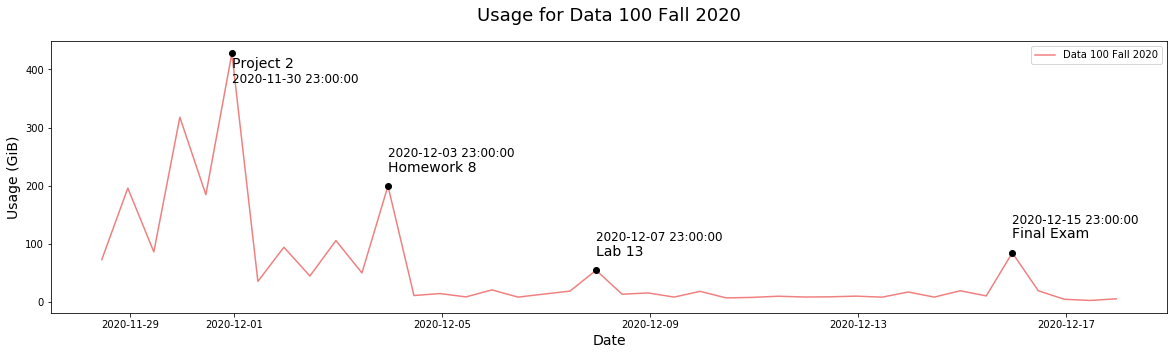

In [39]:
offset = 25

data100_usage_dates = [
    datetime(2020, 11, 30, 23, 0, 0),
    datetime(2020, 12, 3, 23, 0, 0),
    datetime(2020, 12, 7, 23, 0, 0),
    datetime(2020, 12, 15, 23, 0, 0),
]

data100_annotations = pd.DataFrame({
    'x': data100_usage_dates,
    'y': [return_usage_value(data100_fall_usage, date) for date in data100_usage_dates],
    'label': data100_fall_labels[-4:],
    'offset': [-offset, offset, offset, offset]
})

plot_usage_annotations(data100_fall_usage, "Data 100 Fall 2020", data100_annotations, colors[0])

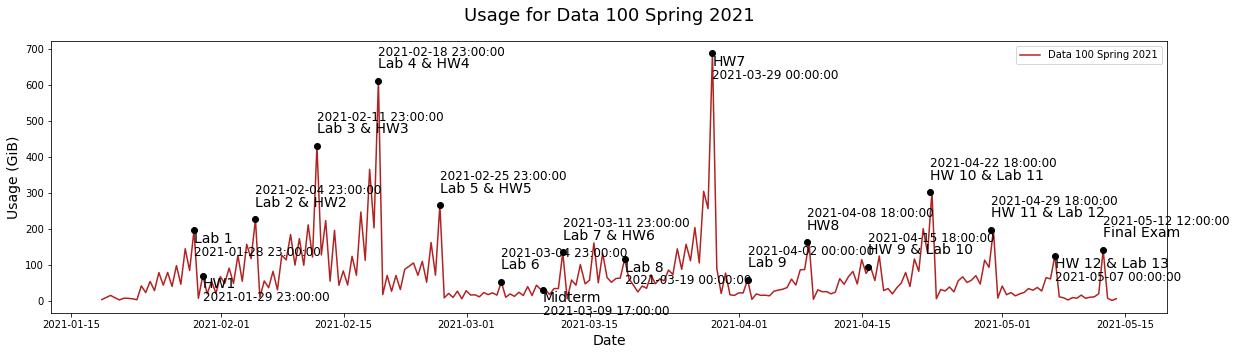

In [40]:
offset = 35

data100_spring_usage_dates = [
    datetime(2021, 1, 28, 23, 0),
    datetime(2021, 1, 29, 23, 0),
    datetime(2021, 2, 4, 23, 0),
    datetime(2021, 2, 11, 23, 0),
    datetime(2021, 2, 18, 23, 0),
    datetime(2021, 2, 25, 23, 0),
    datetime(2021, 3, 4, 23, 0),
    datetime(2021, 3, 9, 23, 0),
    datetime(2021, 3, 11, 23, 0),
    datetime(2021, 3, 19, 0, 0),
    datetime(2021, 3, 29, 0, 0),
    datetime(2021, 4, 2, 0, 0),
    datetime(2021, 4, 9, 0, 0),
    datetime(2021, 4, 16, 0, 0),
    datetime(2021, 4, 23, 0, 0),
    datetime(2021, 4, 30, 0, 0),
    datetime(2021, 5, 7, 0, 0),
    datetime(2021, 5, 12, 12, 0)
]

data100_spring_annotations = pd.DataFrame({
    'x': data100_spring_dates,
    'y': [return_usage_value(data100_spring_usage, date) for date in data100_spring_usage_dates],
    'label': data100_spring_labels,
    'offset': [-offset, -offset, offset, offset, offset, offset, offset, -offset, offset, -offset, -offset, offset, offset, offset, offset, offset, -offset, offset]
})

plot_usage_annotations(data100_spring_usage, "Data 100 Spring 2021", data100_spring_annotations, colors[1])

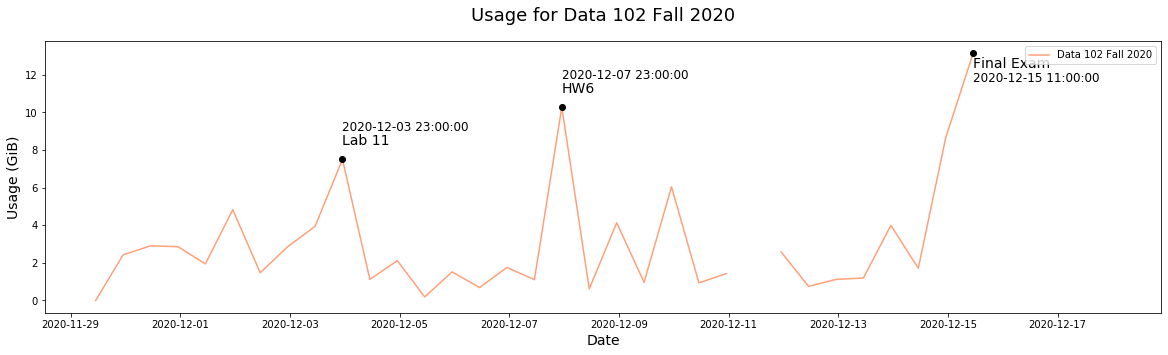

In [41]:
offset = 0.75

data102_fall_usage_dates = [
    datetime(2020, 12, 3, 23, 0),
    datetime(2020, 12, 7, 23, 0),
    datetime(2020, 12, 15, 11, 0)
]

data102_fall_annotations = pd.DataFrame({
    'x': data102_fall_usage_dates,
    'y': [return_usage_value(data102_usage, date) for date in data102_fall_usage_dates],
    'label': data102_fall_labels[-3:],
    'offset': [offset, offset, -offset]
})
plot_usage_annotations(data102_fall_usage, "Data 102 Fall 2020", data102_fall_annotations, colors[2])

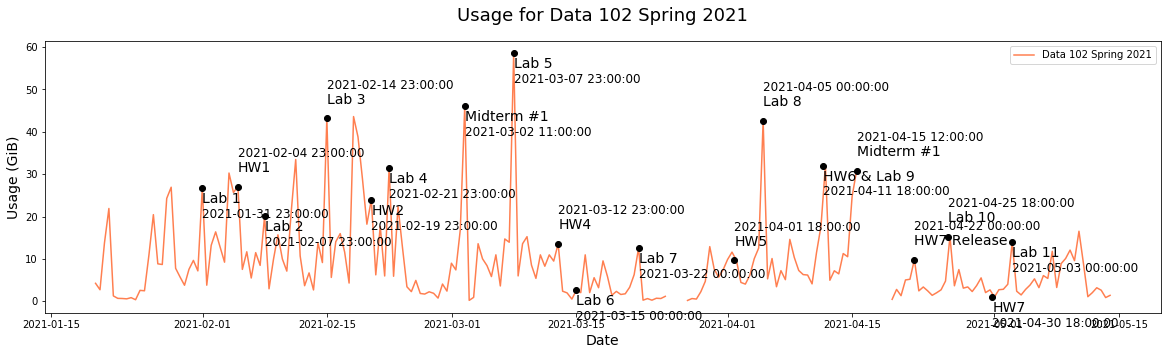

In [42]:
data102_spring_usage_dates = [
    datetime(2021, 1, 31, 23, 0),
    datetime(2021, 2, 4, 23, 0),
    datetime(2021, 2, 7, 23, 0),
    datetime(2021, 2, 14, 23, 0),
    datetime(2021, 2, 19, 23, 0),
    datetime(2021, 2, 21, 23, 0),
    datetime(2021, 3, 2, 11, 0),
    datetime(2021, 3, 7, 23, 0),
    datetime(2021, 3, 12, 23, 0),
    datetime(2021, 3, 15, 0, 0),
    datetime(2021, 3, 22, 0, 0),
    datetime(2021, 4, 5, 0, 0),
    datetime(2021, 4, 2, 0, 0),
    datetime(2021, 4, 12, 0, 0),
    datetime(2021, 4, 15, 12, 0),
    datetime(2021, 4, 22, 0, 0),
    datetime(2021, 4, 26, 0, 0),
    datetime(2021, 5, 1, 0, 0),
    datetime(2021, 5, 3, 0, 0)
]

offset = 3.5
data102_spring_annotations = pd.DataFrame({
    'x': data102_spring,
    'y': [return_usage_value(data102_usage, date) for date in data102_spring_usage_dates],
    'label': data102_spring_labels,
    'offset': [-offset, offset, -offset, offset, -offset, -offset, -offset, -offset, 
               offset, -offset, -offset, offset, offset, -offset, offset, offset,
               offset, -offset, -offset
              ]
})
plot_usage_annotations(data102_spring_usage, "Data 102 Spring 2021", data102_spring_annotations, colors[3])

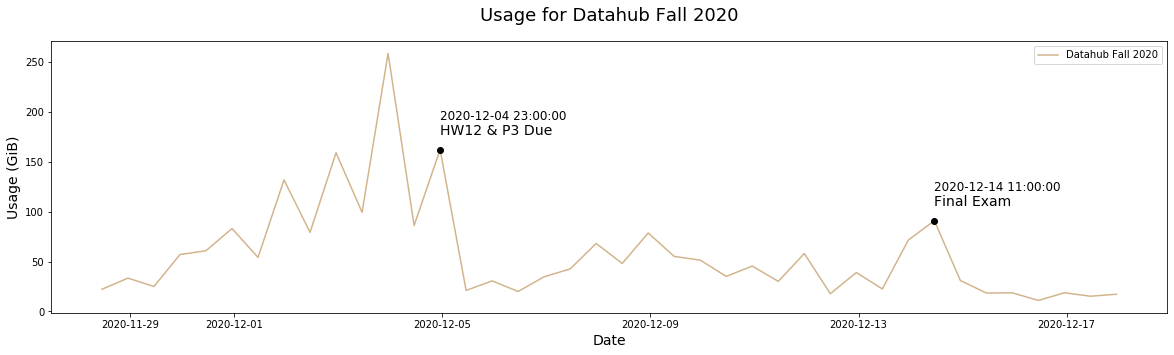

In [43]:
offset = 15

datahub_fall_usage_dates = [
    datetime(2020, 12, 4, 23, 0),
    datetime(2020, 12, 14, 11, 0)
]

datahub_fall_annotations = pd.DataFrame({
    'x': datahub_fall_usage_dates,
    'y': [return_usage_value(datahub_usage, date) for date in datahub_fall_usage_dates],
    'label': datahub_fall_labels[-2:],
    'offset': [offset, offset]
})
plot_usage_annotations(datahub_fall_usage, "Datahub Fall 2020", datahub_fall_annotations, colors[4])

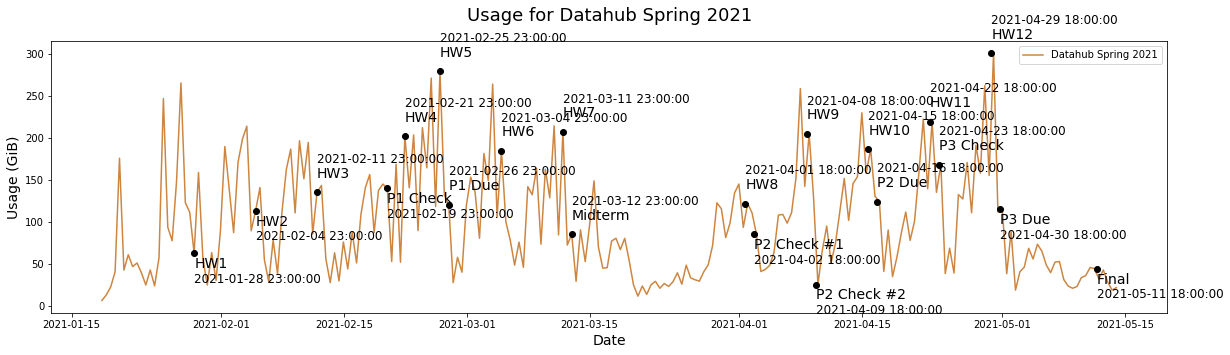

In [44]:
offset = 17.5

datahub_spring_usage_dates = [
    datetime(2021, 1, 28, 23, 0),
    datetime(2021, 2, 4, 23, 0),
    datetime(2021, 2, 11, 23, 0),
    datetime(2021, 2, 19, 23, 0),
    datetime(2021, 2, 21, 23, 0),
    datetime(2021, 2, 25, 23, 0),
    datetime(2021, 2, 26, 23, 0),
    datetime(2021, 3, 4, 23, 0),
    datetime(2021, 3, 11, 23, 0),
    datetime(2021, 3, 12, 23, 0),
    datetime(2021, 4, 2, 0, 0),
    datetime(2021, 4, 3, 0, 0),
    datetime(2021, 4, 9, 0, 0),
    datetime(2021, 4, 10, 0, 0),
    datetime(2021, 4, 16, 0, 0),
    datetime(2021, 4, 17, 0, 0),
    datetime(2021, 4, 23, 0, 0),
    datetime(2021, 4, 24, 0, 0),
    datetime(2021, 4, 30, 0, 0),
    datetime(2021, 5, 1, 0, 0),
    datetime(2021, 5, 11, 12, 0)
]

datahub_spring_annotations = pd.DataFrame({
    'x': datahub_spring,
    'y': [return_usage_value(datahub_usage, date) for date in datahub_spring_usage_dates],
    'label': datahub_spring_labels,
    'offset': [-offset, -offset, offset, -offset, offset, offset, offset, offset, offset, offset, offset, -offset, offset, -offset, offset, offset, offset, offset, offset, -offset, -offset]
})
plot_usage_annotations(datahub_spring_usage, "Datahub Spring 2021", datahub_spring_annotations, colors[5])

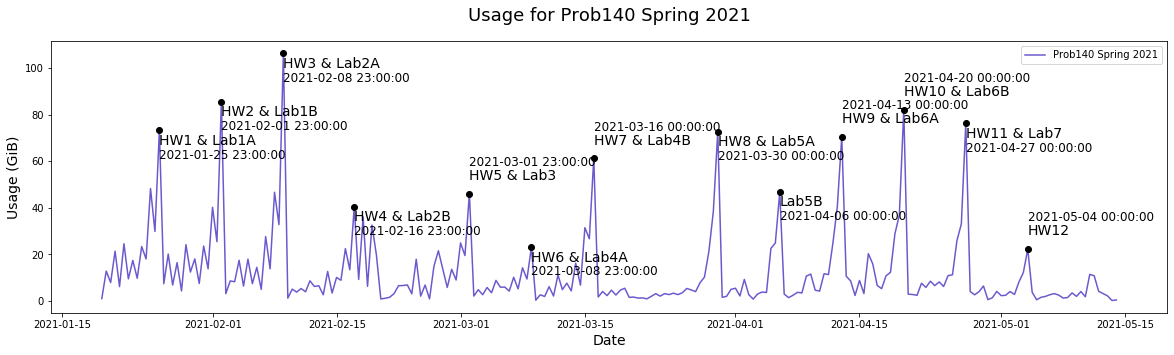

In [45]:
offset = 6
prob140_spring_annotations = pd.DataFrame({
    'x': prob140_spring,
    'y': [return_usage_value(prob140_usage, date) for date in prob140_spring],
    'label': prob140_spring_labels,
    'offset': [-offset, -offset, -offset, -offset, offset, -offset, offset, -offset, -offset, offset, offset, -offset, offset]
})
plot_usage_annotations(prob140_spring_usage, "Prob140 Spring 2021", prob140_spring_annotations, colors[8])